# Upload DF

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import chardet
import glob



def isItUnicode(filename):
    with open(filename, 'rb') as f:
        encodingInfo = chardet.detect(f.read())
        if "UTF" not in encodingInfo['encoding']:
            print("This isn't Unicode! It's", encodingInfo['encoding'])
        else:
            print("Yep, it's Unicode.")

In [4]:
isItUnicode('/content/drive/MyDrive/Notebooks/PUMB/main_dataset.csv')

This isn't Unicode! It's utf-8


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/PUMB/main_dataset.csv')

In [6]:
df2_test = pd.read_csv('/content/drive/MyDrive/Notebooks/PUMB/backtest.csv')

In [7]:
df.shape

(528, 14)

In [8]:
df2_test.shape

(132, 17)

In [ ]:
df.head()

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус
0,10/1/2019,100,120 000,71 736,14.0,99,0.0,Г,60.22,15,126,1,58400.0,0
1,10/2/2019,101,50 000,0,11.0,99,0.0,Б,65.32,15,0,1,67600.0,0
2,10/2/2019,102,50 000,0,12.0,99,0.0,Е,81.31,21,0,0,52800.0,0
3,10/2/2019,103,50 000,10 298,14.0,99,0.0,Д,59.84,15,0,0,49400.0,0
4,10/3/2019,105,60 000,28 045,0.0,99,0.0,Є,103.13,27,0,0,52400.0,0


In [ ]:
df2_test.head()

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус,results Kasianova,results Chernenko,result Lzkhovetskyi
0,10/2/2019,104,50 000,10 311,11.0,88,0.0,Б,60.75,15,0,0,84600.0,1,0,5%,0
1,10/9/2019,111,120 000,80 100,12.0,88,0.0,Б,58.43,27,0,0,45200.0,1,0,51%,0
2,10/9/2019,113,120 000,10 302,11.0,99,0.0,Ї,46.23,15,0,0,67600.0,1,0,20%,0
3,10/10/2019,118,100 000,66 750,11.0,88,0.0,Н,38.72,27,0,0,75800.0,1,0,29%,0
4,10/10/2019,121,50 000,39 677,14.0,99,0.0,Б,60.63,27,117,1,53000.0,1,1,34%,1


# Cleaning /Filling Nan

In [ ]:
def perc_miss(df):
    miss = df.isnull().sum().sort_values(ascending=False)
    miss = miss[miss.values != 0]
    tt_cels = np.product(df.shape)
    tt_missing = miss.sum()

    perc = round(((tt_missing/tt_cels) * 100), 3)
    pr = 'Percent of miss: ' + str(perc) + "%"
    _all = "In sum: " + str(tt_missing.sum())


    miss_perc = round((miss / df.shape[0]) * 100, 3)


    miss_info = miss.astype(str) + ' (' + miss_perc.astype(str) + '%)'

    return pr, _all, miss_info


In [ ]:
perc_miss(df)

<ipython-input-313-d1e3f6df6c5b>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  perc_miss(df)


('Percent of miss: 0.338%',
 'In sum: 25',
 Рейтинговий бал зовнішній    10 (1.894%)
 Сімейний стан                 9 (1.705%)
 Наявність утриманців          6 (1.136%)
 dtype: object)

<Axes: >

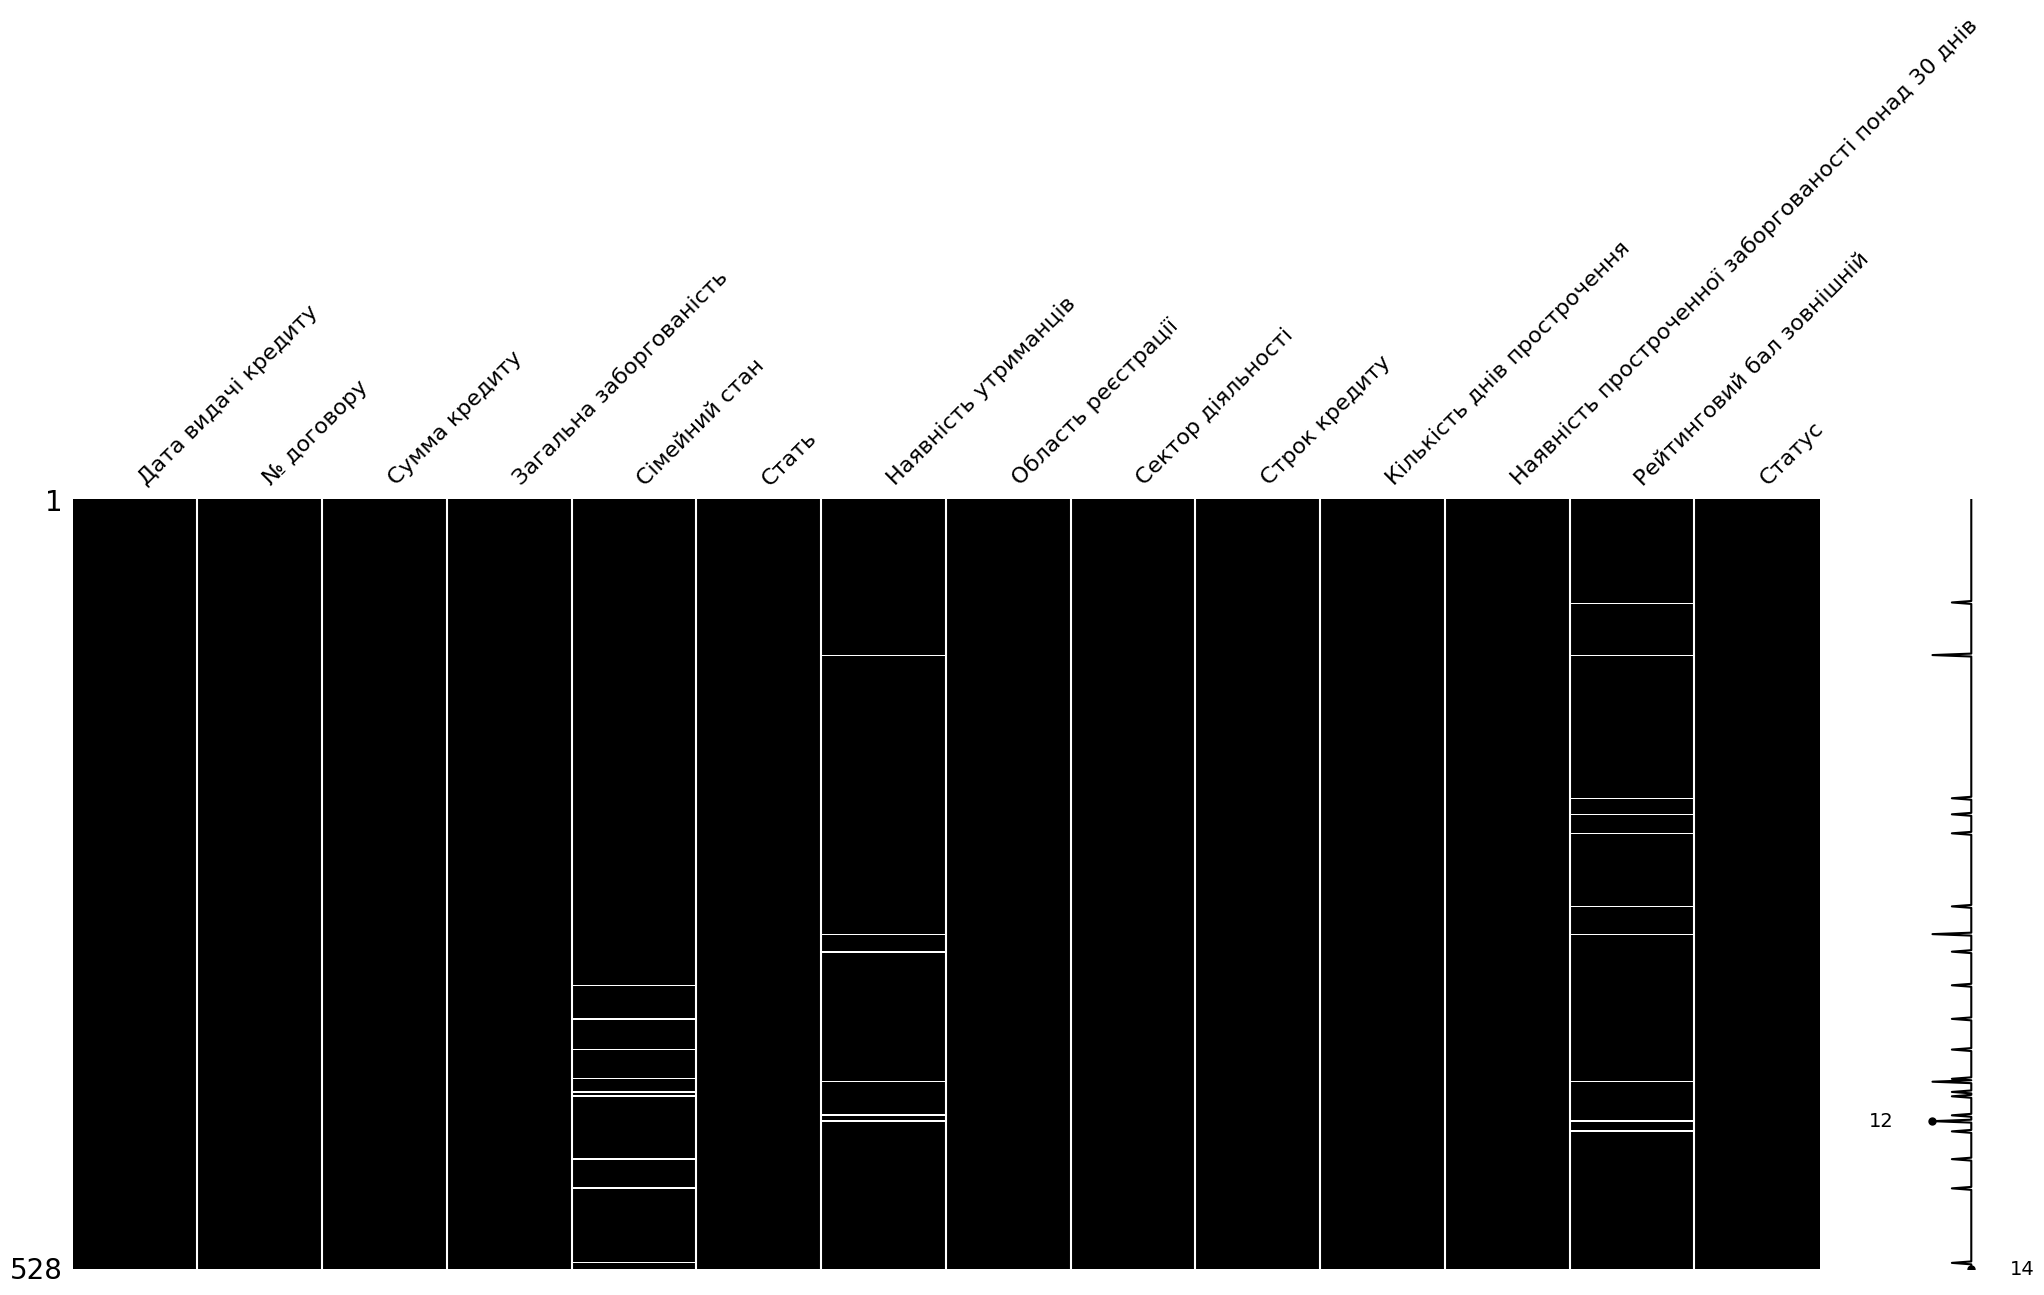

In [ ]:
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [ ]:

for i in df.columns:
  print(i,df[i].unique())
  print('--------------')

Дата видачі кредиту ['10/1/2019' '10/2/2019' '10/3/2019' '10/4/2019' '10/5/2019' '10/9/2019'
 '10/10/2019' '10/11/2019' '10/12/2019' '10/15/2019' '10/16/2019'
 '10/17/2019' '10/18/2019' '10/19/2019' '10/22/2019' '10/23/2019'
 '10/24/2019' '10/25/2019' '10/26/2019' '10/29/2019' '10/30/2019'
 '11/1/2019' '11/2/2019' '11/3/2019' '11/6/2019' '11/7/2019' '11/8/2019'
 '11/9/2019' '11/10/2019' '11/13/2019' '11/14/2019' '11/15/2019'
 '11/16/2019' '11/17/2019' '11/20/2019' '11/22/2019' '11/23/2019'
 '11/24/2019' '11/28/2019' '11/29/2019' '11/30/2019' '12/4/2019'
 '12/5/2019' '12/6/2019' '12/10/2019' '12/11/2019' '12/12/2019'
 '12/13/2019' '12/14/2019' '12/17/2019' '12/18/2019' '12/19/2019'
 '12/20/2019' '12/21/2019' '12/24/2019' '12/25/2019' '12/26/2019'
 '12/27/2019' '12/28/2019' '12/31/2019' '1/1/2020' '1/2/2020' '1/3/2020'
 '1/4/2020' '1/7/2020' '1/8/2020' '1/9/2020' '1/10/2020' '1/11/2020'
 '1/14/2020' '1/15/2020' '1/17/2020' '1/18/2020' '1/21/2020' '1/22/2020'
 '1/22/2010' '1/23/2020' '1/2

In [ ]:
df.groupby('Наявність утриманців').size()

Наявність утриманців
0.0    439
1.0     44
2.0     33
3.0      5
4.0      1
dtype: int64

In [ ]:
df.groupby('Сімейний стан').size()

Сімейний стан
0.0      29
11.0    256
12.0     29
13.0      8
14.0    197
dtype: int64

In [ ]:
df[df['Наявність утриманців'].isnull()]

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус
107,10/23/2019,234,40 000,0,14.0,88,NaN,Н,58.430,12,0,0,NaN,0
298,12/11/2019,472,50 000,32 348,11.0,88,NaN,Д,60.220,21,0,0,NaN,0
310,12/13/2019,489,50 000,37 441,11.0,99,NaN,К,56.420,27,0,1,45800.0,0
399,1/8/2020,598,40 000,31 696,14.0,88,NaN,Б,60.100,27,0,1,NaN,0
422,1/21/2020,628,150 000,150 000,11.0,99,NaN,О,60.102,15,217,1,81800.0,0
426,1/21/2020,632,50 000,28 650,11.0,99,NaN,Н,79.330,27,0,0,NaN,0


In [ ]:
df['Наявність утриманців'].fillna('0.0',inplace=True)

In [ ]:
df['Сімейний стан'].fillna(11.0,inplace=True)

In [ ]:
perc_miss(df)

<ipython-input-321-d1e3f6df6c5b>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  perc_miss(df)


('Percent of miss: 0.135%',
 'In sum: 10',
 Рейтинговий бал зовнішній    10 (1.894%)
 dtype: object)

In [ ]:
df.head()

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус
0,10/1/2019,100,120 000,71 736,14.0,99,0.0,Г,60.22,15,126,1,58400.0,0
1,10/2/2019,101,50 000,0,11.0,99,0.0,Б,65.32,15,0,1,67600.0,0
2,10/2/2019,102,50 000,0,12.0,99,0.0,Е,81.31,21,0,0,52800.0,0
3,10/2/2019,103,50 000,10 298,14.0,99,0.0,Д,59.84,15,0,0,49400.0,0
4,10/3/2019,105,60 000,28 045,0.0,99,0.0,Є,103.13,27,0,0,52400.0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np

def encode_features(df, columns):
    le_dict = {}
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        le_dict[col] = le
    return df, le_dict

def fill_missing_prdc_regression(df, target_column, feat_col_hot=[], exclude_columns=[]):
    # Drop specified columns to avoid processing them
    df = df.drop(columns=exclude_columns, errors='ignore')

    # Apply one-hot encoding where specified
    if feat_col_hot:
        df = pd.get_dummies(df, columns=feat_col_hot, drop_first=True)

    # Automatically consider all other columns for features, excluding the target
    feature_columns = [col for col in df.columns if col != target_column]

    # Split dataset
    df_non_null = df.dropna(subset=[target_column])
    df_null = df[df[target_column].isnull()]

    X_train = df_non_null[feature_columns]
    y_train = df_non_null[target_column]
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Model training
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)

    # Validate model
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    print(f"Model RMSE: {rmse:.2f}")
    r2 = r2_score(y_val, y_pred)
    print(f"R^2 score: {r2:.2f}")

    # Predict missing values
    if not df_null.empty:
        X_predict = df_null[feature_columns]
        predicted_values = model.predict(X_predict)
        df.loc[df[target_column].isnull(), target_column] = predicted_values

    return df

In [ ]:

for i in df.columns:
  print(i,df[i].dtype)
  print('--------------')

Дата видачі кредиту object
--------------
№ договору int64
--------------
Сумма кредиту object
--------------
Загальна заборгованість object
--------------
Сімейний стан float64
--------------
Стать int64
--------------
Наявність утриманців object
--------------
Область реєстрації object
--------------
Сектор діяльності float64
--------------
Строк кредиту int64
--------------
Кількість днів прострочення int64
--------------
Наявність простроченної заборгованості понад 30 днів  int64
--------------
Рейтинговий бал зовнішній float64
--------------
Статус int64
--------------


In [ ]:
df['Наявність утриманців'] = df['Наявність утриманців'].astype(float)

In [ ]:
df.columns

Index(['Дата видачі кредиту', '№ договору', 'Сумма кредиту',
       'Загальна заборгованість', 'Сімейний стан', 'Стать',
       'Наявність утриманців', 'Область реєстрації', 'Сектор діяльності',
       'Строк кредиту', 'Кількість днів прострочення',
       'Наявність простроченної заборгованості понад 30 днів ',
       'Рейтинговий бал зовнішній', 'Статус'],
      dtype='object')

In [ ]:
import re

def convert_to_numeric(value_str):
    # Remove the non-breaking space character
    cleaned_str = re.sub(r'\xa0', '', value_str)

    # Convert the cleaned string to a float
    numeric_value = float(cleaned_str)

    return numeric_value

In [ ]:
df['Загальна заборгованість'] = df['Загальна заборгованість'].map(convert_to_numeric)

In [ ]:
df['Сумма кредиту'] = df['Сумма кредиту'].map(convert_to_numeric)

In [ ]:
df.head()

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус
0,10/1/2019,100,120000.0,71736.0,14.0,99,0.0,Г,60.22,15,126,1,58400.0,0
1,10/2/2019,101,50000.0,0.0,11.0,99,0.0,Б,65.32,15,0,1,67600.0,0
2,10/2/2019,102,50000.0,0.0,12.0,99,0.0,Е,81.31,21,0,0,52800.0,0
3,10/2/2019,103,50000.0,10298.0,14.0,99,0.0,Д,59.84,15,0,0,49400.0,0
4,10/3/2019,105,60000.0,28045.0,0.0,99,0.0,Є,103.13,27,0,0,52400.0,0


In [ ]:
excl= ['Дата видачі кредиту','№ договору','Область реєстрації','Сімейний стан']


In [ ]:
df.columns

Index(['Дата видачі кредиту', '№ договору', 'Сумма кредиту',
       'Загальна заборгованість', 'Сімейний стан', 'Стать',
       'Наявність утриманців', 'Область реєстрації', 'Сектор діяльності',
       'Строк кредиту', 'Кількість днів прострочення',
       'Наявність простроченної заборгованості понад 30 днів ',
       'Рейтинговий бал зовнішній', 'Статус'],
      dtype='object')

In [ ]:
df.head()

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус
0,10/1/2019,100,120000.0,71736.0,14.0,99,0.0,Г,60.22,15,126,1,58400.0,0
1,10/2/2019,101,50000.0,0.0,11.0,99,0.0,Б,65.32,15,0,1,67600.0,0
2,10/2/2019,102,50000.0,0.0,12.0,99,0.0,Е,81.31,21,0,0,52800.0,0
3,10/2/2019,103,50000.0,10298.0,14.0,99,0.0,Д,59.84,15,0,0,49400.0,0
4,10/3/2019,105,60000.0,28045.0,0.0,99,0.0,Є,103.13,27,0,0,52400.0,0


In [ ]:
df.shape

(528, 14)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
№ договору,528.0,429.037879,190.665584,100.00,263.75,428.50,593.50,759.0
Сумма кредиту,528.0,104735.606061,70072.909314,40000.00,50000.00,80000.00,120000.00,500000.0
Загальна заборгованість,528.0,62942.049242,69995.350387,0.00,16237.50,46454.50,83763.75,500000.0
Сімейний стан,528.0,11.600379,3.126880,0.00,11.00,11.00,14.00,14.0
Стать,528.0,93.854167,5.493790,88.00,88.00,99.00,99.00,99.0
Наявність утриманців,528.0,0.244318,0.624428,0.00,0.00,0.00,0.00,4.0
Сектор діяльності,528.0,64.003975,16.206436,14.22,59.53,60.34,69.21,109.2
Строк кредиту,528.0,22.857955,5.877036,12.00,15.00,27.00,27.00,39.0
Кількість днів прострочення,528.0,23.145833,66.985339,0.00,0.00,0.00,0.00,643.0
Наявність простроченної заборгованості понад 30 днів,528.0,0.248106,0.432323,0.00,0.00,0.00,0.00,1.0


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

def knn_impute(df, target_column, n_neighbors, not_include=None):
    # Handle default parameter for not_include
    if not_include is None:
        not_include = []

    # Identify columns to use in imputation
    columns_to_use = df.columns.difference(not_include + [target_column]).tolist()

    # Ensuring target column is not in the not_include list
    if target_column in not_include:
        raise ValueError(f"The target column '{target_column}' should not be in the not_include list.")

    # Subset the DataFrame to the columns to be used
    imputation_data = df[columns_to_use + [target_column]]

    # Setting up the KNN Imputer
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill NaNs
    imputed_data = imputer.fit_transform(imputation_data)

    # Convert the array back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=columns_to_use + [target_column])

    # Update the original DataFrame with imputed values in the target column
    df[target_column] = imputed_df[target_column]

    return df

In [ ]:
df[df['Рейтинговий бал зовнішній'].isnull()]

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус
71,10/18/2019,189,110000.0,36838.0,11.0,88,0.0,Т,60.84,27,0,0,NaN,0
107,10/23/2019,234,40000.0,0.0,14.0,88,0.0,Н,58.43,12,0,0,NaN,0
205,11/2/2019,356,70000.0,0.0,0.0,88,0.0,Н,60.10,24,0,0,NaN,0
216,11/3/2019,369,80000.0,43610.0,14.0,99,1.0,Б,72.22,27,0,0,NaN,0
229,11/7/2019,386,80000.0,56730.0,14.0,88,0.0,К,60.82,27,0,0,NaN,0
279,11/30/2019,449,50000.0,35070.0,11.0,99,3.0,І,38.73,27,0,0,NaN,0
298,12/11/2019,472,50000.0,32348.0,11.0,88,0.0,Д,60.22,21,0,0,NaN,0
399,1/8/2020,598,40000.0,31696.0,14.0,88,0.0,Б,60.10,27,0,1,NaN,0
426,1/21/2020,632,50000.0,28650.0,11.0,99,0.0,Н,79.33,27,0,0,NaN,0
433,1/23/2020,641,80000.0,63391.0,14.0,99,0.0,Н,14.22,27,0,0,NaN,0


In [ ]:
df = knn_impute(df, 'Рейтинговий бал зовнішній',5, not_include=excl).copy()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
len(df['№ договору'].unique())

528

In [ ]:
df.head()

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус
0,10/1/2019,100,120000.0,71736.0,14.0,99,0.0,Г,60.22,15,126,1,58400.0,0
1,10/2/2019,101,50000.0,0.0,11.0,99,0.0,Б,65.32,15,0,1,67600.0,0
2,10/2/2019,102,50000.0,0.0,12.0,99,0.0,Е,81.31,21,0,0,52800.0,0
3,10/2/2019,103,50000.0,10298.0,14.0,99,0.0,Д,59.84,15,0,0,49400.0,0
4,10/3/2019,105,60000.0,28045.0,0.0,99,0.0,Є,103.13,27,0,0,52400.0,0


In [ ]:
df.drop('Статус',axis=1,inplace=True)

# Feature Engineering

In [ ]:
pip install featuretools

In [ ]:
import featuretools as ft

es = ft.EntitySet(id='№ договору')
es = es.add_dataframe(dataframe_name='clients',dataframe=df,index='№ договору')

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name='clients',
                                      max_depth=2)


print(feature_defs)
print(feature_matrix.head())

[<Feature: Сумма кредиту>, <Feature: Загальна заборгованість>, <Feature: Сімейний стан>, <Feature: Стать>, <Feature: Наявність утриманців>, <Feature: Область реєстрації>, <Feature: Сектор діяльності>, <Feature: Строк кредиту>, <Feature: Кількість днів прострочення>, <Feature: Наявність простроченної заборгованості понад 30 днів >, <Feature: Рейтинговий бал зовнішній>, <Feature: DAY(Дата видачі кредиту)>, <Feature: MONTH(Дата видачі кредиту)>, <Feature: WEEKDAY(Дата видачі кредиту)>, <Feature: YEAR(Дата видачі кредиту)>]
            Сумма кредиту  Загальна заборгованість  Сімейний стан  Стать  \
№ договору                                                                 
100              120000.0                  71736.0           14.0     99   
101               50000.0                      0.0           11.0     99   
102               50000.0                      0.0           12.0     99   
103               50000.0                  10298.0           14.0     99   
105               

/usr/local/lib/python3.10/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [ ]:
df= feature_matrix.copy()

In [ ]:
df['Прострочення по договору'] = df['Кількість днів прострочення'] > 30

In [ ]:
df['Прострочення по договору'] = df['Прострочення по договору'].map({True:1,False:0})

In [ ]:
df.head()

,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,DAY(Дата видачі кредиту),MONTH(Дата видачі кредиту),WEEKDAY(Дата видачі кредиту),YEAR(Дата видачі кредиту),Прострочення по договору
№ договору,,,,,,,,,,,,,,,,
100,120000.0,71736.0,14.0,99,0.0,Г,60.22,15,126,1,58400.0,1,10,1,2019,1
101,50000.0,0.0,11.0,99,0.0,Б,65.32,15,0,1,67600.0,2,10,2,2019,0
102,50000.0,0.0,12.0,99,0.0,Е,81.31,21,0,0,52800.0,2,10,2,2019,0
103,50000.0,10298.0,14.0,99,0.0,Д,59.84,15,0,0,49400.0,2,10,2,2019,0
105,60000.0,28045.0,0.0,99,0.0,Є,103.13,27,0,0,52400.0,3,10,3,2019,0


In [ ]:
cls_dt = ['DAY(Дата видачі кредиту)','MONTH(Дата видачі кредиту)','WEEKDAY(Дата видачі кредиту)','YEAR(Дата видачі кредиту)']

In [ ]:
df[cls_dt] = df[cls_dt].astype(int)

# Handling Outliers

<ipython-input-352-27bfadb71b21>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-352-27bfadb71b21>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-352-27bfadb71b21>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-352-27bfadb71b21>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей
<ipython-input-352-27bfadb71b21>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_

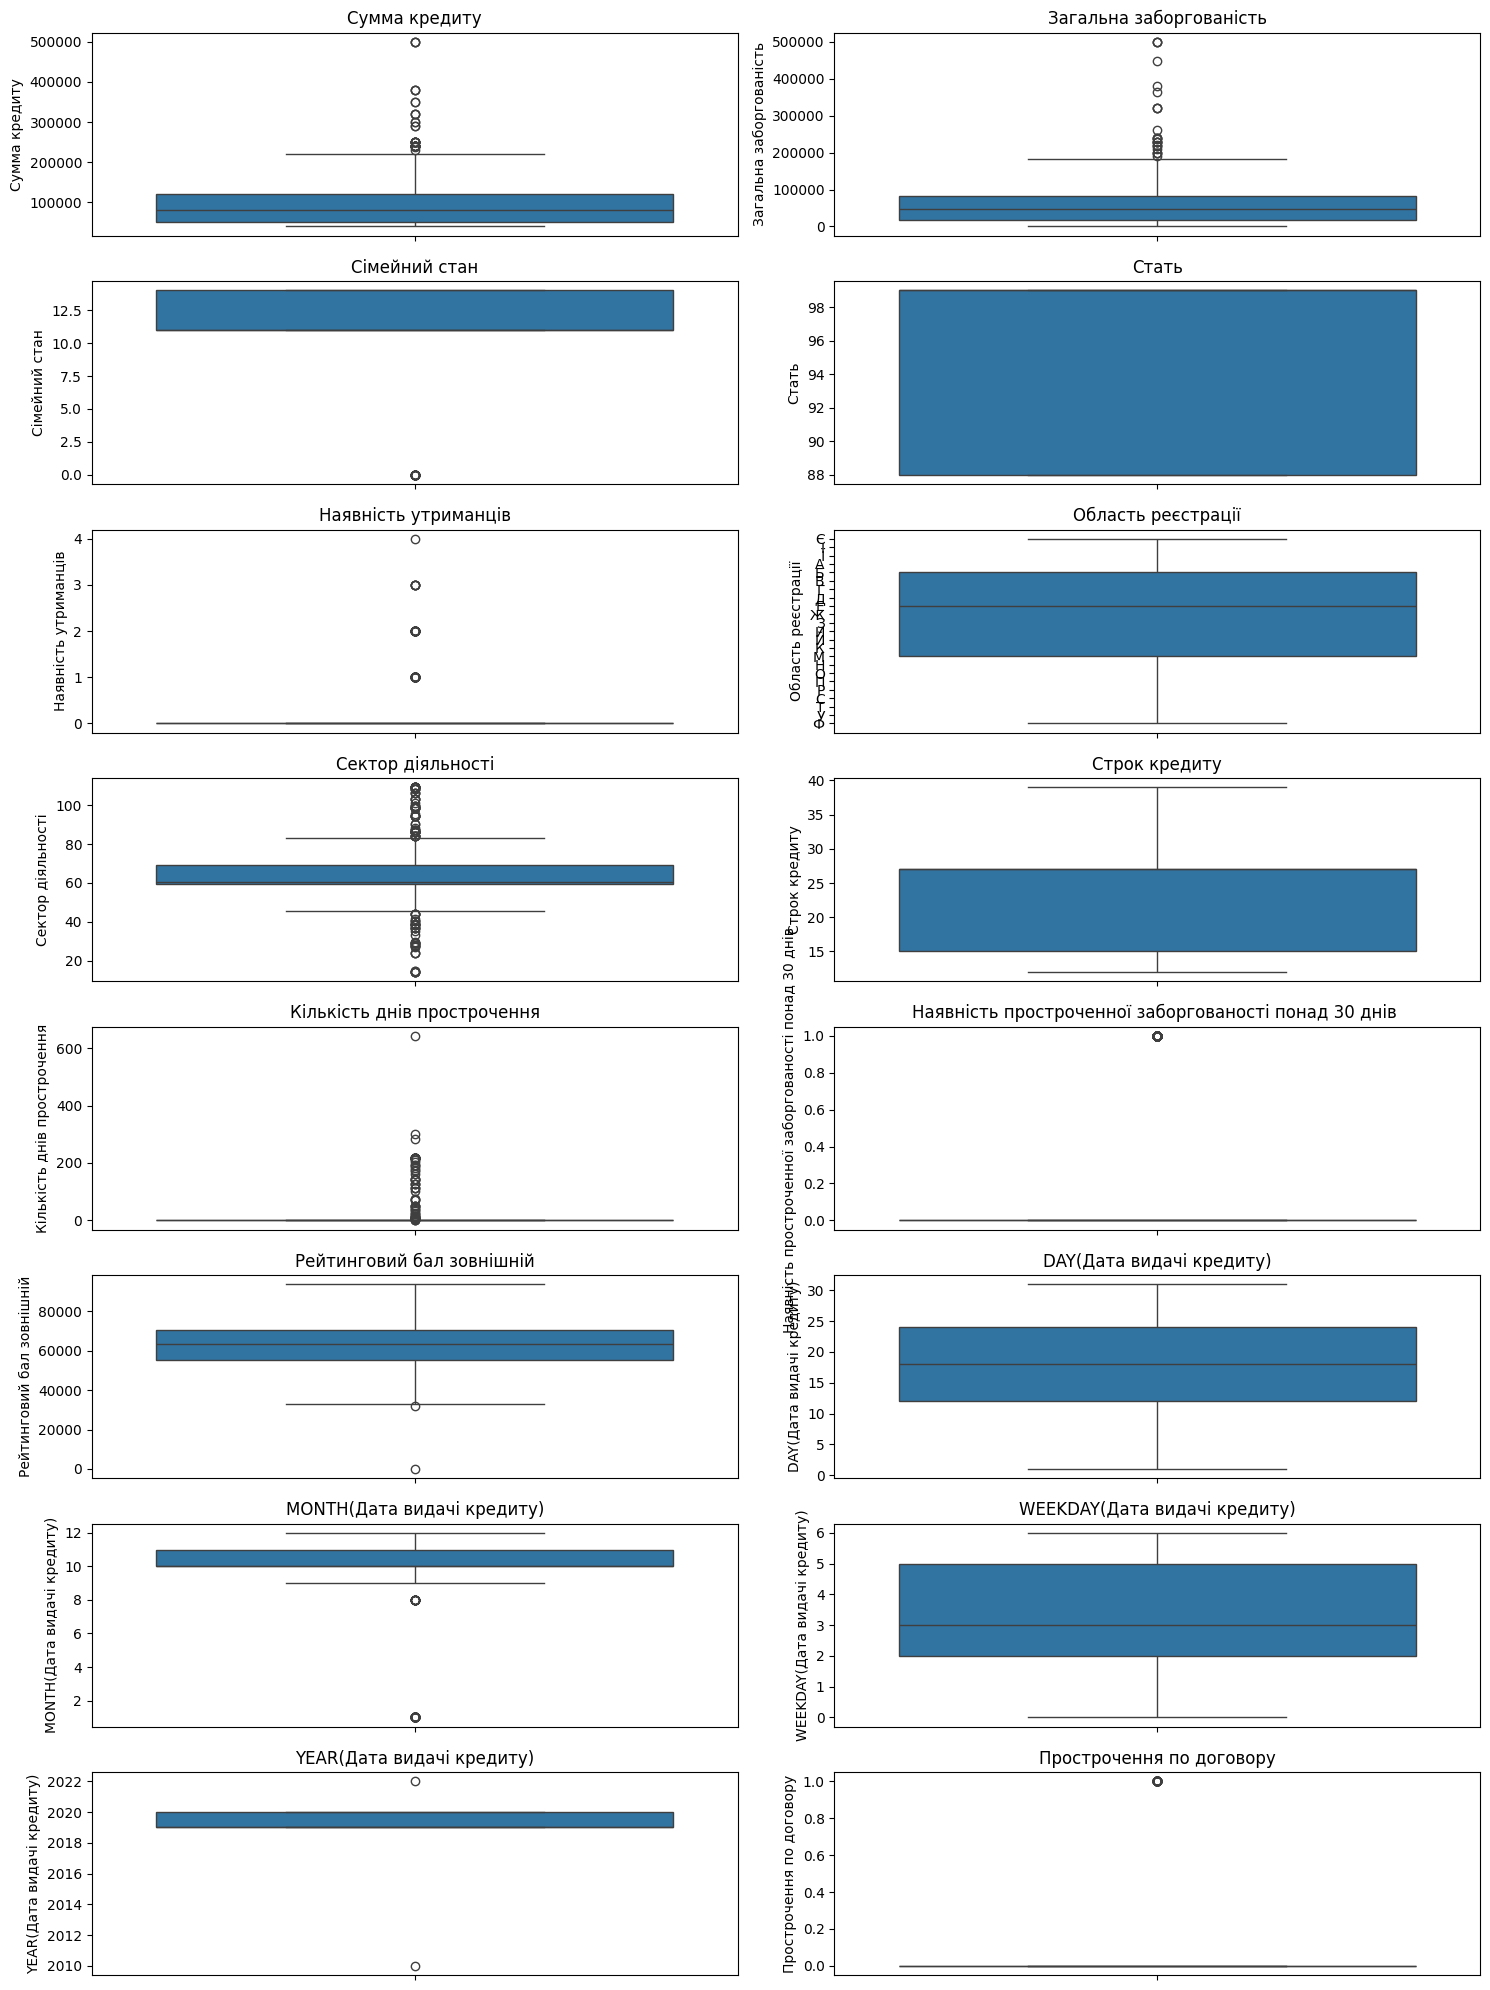

In [ ]:

col = list(df.columns)

n_cols = 2
n_rows = (len(col) + n_cols - 1) // n_cols  # Заокруглюємо в більшу сторону

# Створюємо достатню кількість підзаголовків
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

# Заповнюємо всі пусті підзаголовки (якщо є)
for ax in axes.flatten()[len(col):]:
    ax.remove()

# Приводимо список осей до одновимірного масиву для легкої ітерації
axes_flat = axes.flatten()

for i, column_name in enumerate(col):
    # Виводимо дані на i-й підзаголовок
    sns.boxplot(df[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(column_name)  # Встановлюємо заголовок
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)  # Повертаємо мітки осей

# Коригуємо розташування для запобігання перекриття
plt.tight_layout()



In [ ]:
df.shape

(528, 16)

In [ ]:
df = df[df['Сумма кредиту'] < 400000]

In [ ]:
df = df[df['Кількість днів прострочення'] < 500]

In [ ]:
df.shape

(524, 16)

# Encoding

In [ ]:
df.columns

Index(['Сумма кредиту', 'Загальна заборгованість', 'Сімейний стан', 'Стать',
       'Наявність утриманців', 'Область реєстрації', 'Сектор діяльності',
       'Строк кредиту', 'Кількість днів прострочення',
       'Наявність простроченної заборгованості понад 30 днів ',
       'Рейтинговий бал зовнішній', 'DAY(Дата видачі кредиту)',
       'MONTH(Дата видачі кредиту)', 'WEEKDAY(Дата видачі кредиту)',
       'YEAR(Дата видачі кредиту)', 'Прострочення по договору'],
      dtype='object')

In [ ]:

for i in df.columns:
  print(i,df[i].unique())
  print('--------------')

Сумма кредиту [120000.  50000.  60000. 110000.  40000.  80000. 250000. 150000.  90000.
 210000. 140000. 130000.  70000. 100000. 230000. 190000. 200000. 220000.
 160000. 180000. 240000. 170000. 300000. 320000. 290000. 380000. 350000.
 101400. 239000.]
--------------
Загальна заборгованість [7.17360e+04 0.00000e+00 1.02980e+04 2.80450e+04 5.00000e+04 9.61830e+04
 3.33750e+04 1.21200e+05 1.30175e+05 1.54690e+04 7.87500e+04 3.24500e+04
 3.33960e+04 4.03670e+04 3.18050e+04 6.42480e+04 8.18630e+04 1.07350e+05
 9.34490e+04 5.50970e+04 1.23360e+04 4.37500e+04 1.66670e+04 4.16660e+04
 1.66800e+05 1.54680e+04 1.22500e+05 5.34000e+04 6.67460e+04 5.31520e+04
 5.80760e+04 6.25000e+03 7.03640e+04 1.39400e+04 1.32094e+05 3.66000e+04
 1.64880e+04 4.15610e+04 4.23500e+04 8.01000e+04 9.54380e+04 1.00333e+05
 1.07630e+05 5.23180e+04 3.09380e+04 3.39500e+04 9.34500e+04 2.16560e+04
 3.68380e+04 3.35860e+04 6.62140e+04 6.00750e+04 1.26825e+05 4.21870e+04
 3.01670e+04 1.55680e+04 2.22000e+04 1.67140e+04 3.60

In [ ]:
df.head()

,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,DAY(Дата видачі кредиту),MONTH(Дата видачі кредиту),WEEKDAY(Дата видачі кредиту),YEAR(Дата видачі кредиту),Прострочення по договору
№ договору,,,,,,,,,,,,,,,,
100,120000.0,71736.0,14.0,99,0.0,Г,60.22,15,126,1,58400.0,1,10,1,2019,1
101,50000.0,0.0,11.0,99,0.0,Б,65.32,15,0,1,67600.0,2,10,2,2019,0
102,50000.0,0.0,12.0,99,0.0,Е,81.31,21,0,0,52800.0,2,10,2,2019,0
103,50000.0,10298.0,14.0,99,0.0,Д,59.84,15,0,0,49400.0,2,10,2,2019,0
105,60000.0,28045.0,0.0,99,0.0,Є,103.13,27,0,0,52400.0,3,10,3,2019,0


In [ ]:
df['Сімейний стан'] = df['Сімейний стан'].map({0.0:'S1',11.0:'S2',12.0:'S3',13.0:'S4',14.0:'S5'})

In [ ]:
df['Стать'] = df['Стать'].map({88:'G1',99:'G2'})

In [ ]:
df_cp = df.copy()

hot_col = ['Область реєстрації','Сімейний стан','Стать']


hot = pd.get_dummies(df_cp[hot_col])
hot = hot.astype('float64')
df_cp = df_cp.drop(hot_col,axis=1)
df_cp = df_cp.join(hot)

In [ ]:
df = df_cp.copy()

In [ ]:

for i in df.columns:
  print(i,df[i].unique())
  print('--------------')

Сумма кредиту [120000.  50000.  60000. 110000.  40000.  80000. 250000. 150000.  90000.
 210000. 140000. 130000.  70000. 100000. 230000. 190000. 200000. 220000.
 160000. 180000. 240000. 170000. 300000. 320000. 290000. 380000. 350000.
 101400. 239000.]
--------------
Загальна заборгованість [7.17360e+04 0.00000e+00 1.02980e+04 2.80450e+04 5.00000e+04 9.61830e+04
 3.33750e+04 1.21200e+05 1.30175e+05 1.54690e+04 7.87500e+04 3.24500e+04
 3.33960e+04 4.03670e+04 3.18050e+04 6.42480e+04 8.18630e+04 1.07350e+05
 9.34490e+04 5.50970e+04 1.23360e+04 4.37500e+04 1.66670e+04 4.16660e+04
 1.66800e+05 1.54680e+04 1.22500e+05 5.34000e+04 6.67460e+04 5.31520e+04
 5.80760e+04 6.25000e+03 7.03640e+04 1.39400e+04 1.32094e+05 3.66000e+04
 1.64880e+04 4.15610e+04 4.23500e+04 8.01000e+04 9.54380e+04 1.00333e+05
 1.07630e+05 5.23180e+04 3.09380e+04 3.39500e+04 9.34500e+04 2.16560e+04
 3.68380e+04 3.35860e+04 6.62140e+04 6.00750e+04 1.26825e+05 4.21870e+04
 3.01670e+04 1.55680e+04 2.22000e+04 1.67140e+04 3.60

# EDA

In [ ]:
from scipy.stats import pearsonr, spearmanr, pointbiserialr
import pandas as pd

def there_is_corr(df, y, mth='pr'):
    results = {}

    if y not in df.columns:
        return "The specified target variable is not in the DataFrame."

    for column in df.columns:
        if column != y:
            correlation, p_value = None, None

            if mth == 'pr':
                correlation, p_value = pearsonr(df[column], df[y])
            elif mth == 'sp':
                correlation, p_value = spearmanr(df[column], df[y])
            elif mth == 'pb':
                correlation, p_value = pointbiserialr(df[column], df[y])

            # Check if the correlation is significant and not within the [-0.1, 0.1] range
            if p_value < 0.05 and abs(correlation) > 0.1:
                results[column] = {'Correlation': correlation, 'P-value': round(p_value, 3)}

    results_df = pd.DataFrame.from_dict(results, orient='index')
    return results_df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def scatt_y(df, y, cols, hue_col=None):

    df_col1 = df.drop(y, axis=1)
    df_col = df_col1[cols]
    n_cols = len(df_col)


    max_rows = 10
    n_rows = min((n_cols + 1) // 2, max_rows)
    fig, axs = plt.subplots(n_rows, 2, figsize=(14, n_rows * 5))


    if n_cols % 2 != 0 and n_rows == (n_cols + 1) // 2:
        fig.delaxes(axs[-1, -1])

    if n_rows == 1:
        axs = [axs]


    colors = {0: 'blue', 1: 'orange'} if hue_col else 'pink'


    for i, col in enumerate(df_col):
        ax = axs[i // 2, i % 2] if n_rows > 1 else axs[i % 2]
        if hue_col:

            scatter = ax.scatter(df[col], df[y], c=df[hue_col].apply(lambda x: colors.get(x)), marker='o')

            handles, labels = scatter.legend_elements(prop="colors")
            labels = [f'Category {i}' for i in [0, 1]]
            legend = ax.legend(handles, labels, title=hue_col)
            ax.add_artist(legend)
        else:
            # Plot without hue
            ax.scatter(df[col], df[y], marker='o', c=colors)
        ax.set_xlabel(col)
        ax.set_ylabel(y)

    plt.tight_layout()
    plt.show()

In [ ]:
cols = ['Загальна заборгованість','Строк кредиту','Наявність простроченної заборгованості понад 30 днів ','Рейтинговий бал зовнішній','Область реєстрації_Ж','Область реєстрації_Й','Область реєстрації_М']

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure t

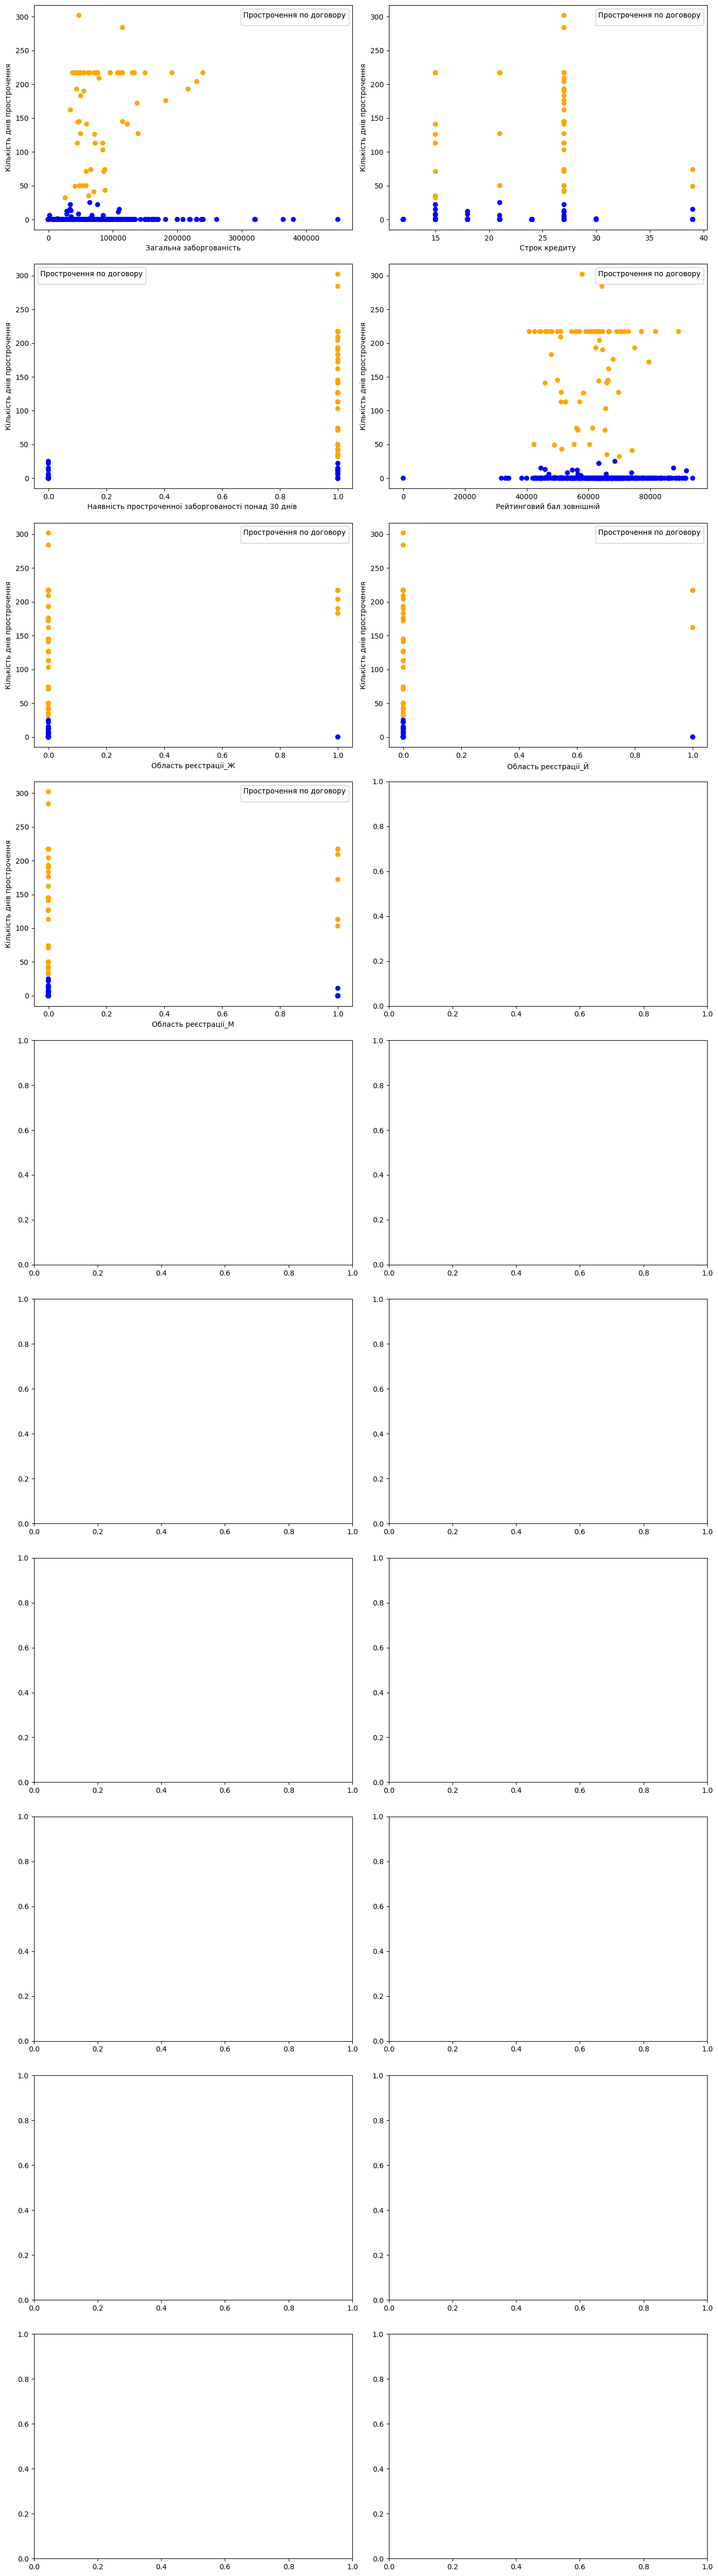

In [ ]:
scatt_y(df,'Кількість днів прострочення',cols,'Прострочення по договору')

In [ ]:
from scipy.stats import norm

def all_hist(df):
    df_col = df.columns
    df_col = [i for i in df_col if df[i].dtype in ['int64', 'float64']]

    for i, col in enumerate(df_col):
        plt.figure(i)
        data = df[col]
        data.hist(bins=28, density=True, alpha=0.6, color='g')

        # Обчислюємо параметри для нормального розподілу
        mu, std = norm.fit(data)

        # Генеруємо значення для нормального розподілу
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)

        # Малюємо криву нормального розподілу
        plt.plot(x, p, 'k', linewidth=2)

        title = f"{col}, mu = {mu:.2f},  std = {std:.2f}"
        plt.title(title)

        plt.axvline(mu, color='k', linestyle='dashed', linewidth=1)


        plt.show()


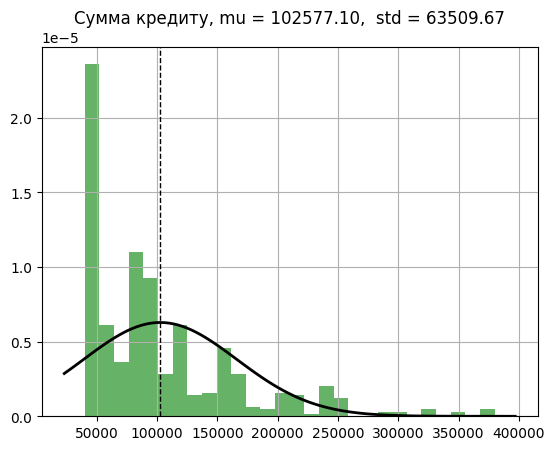

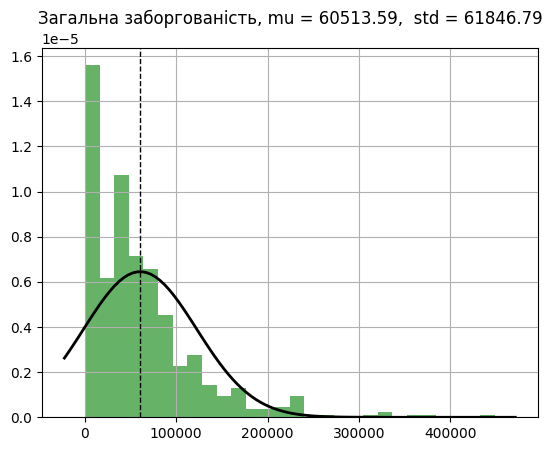

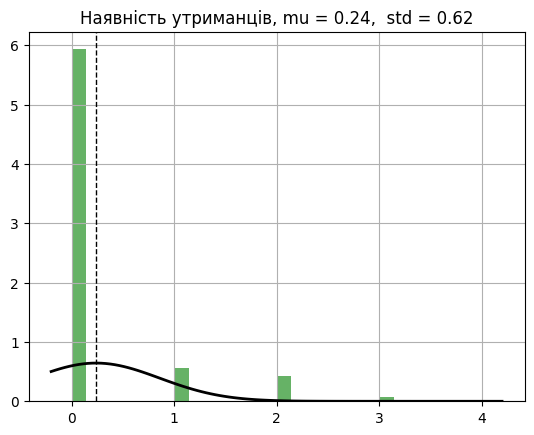

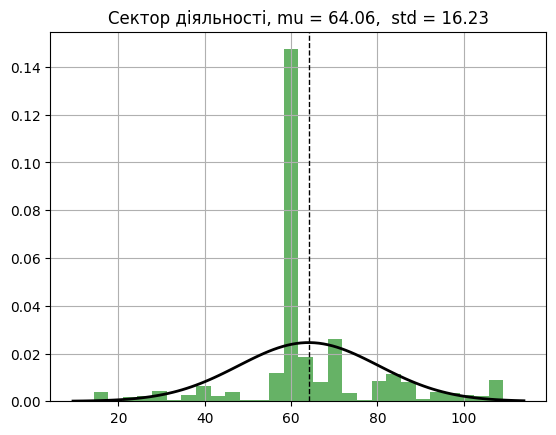

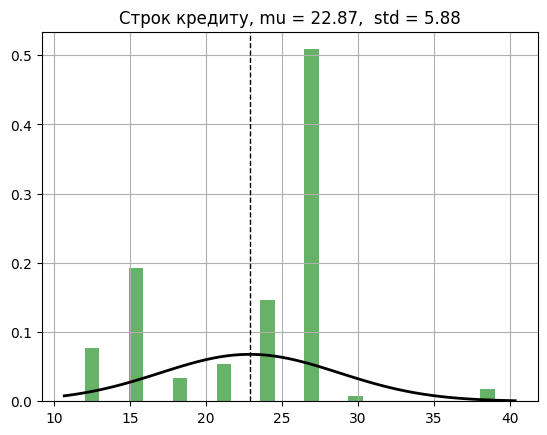

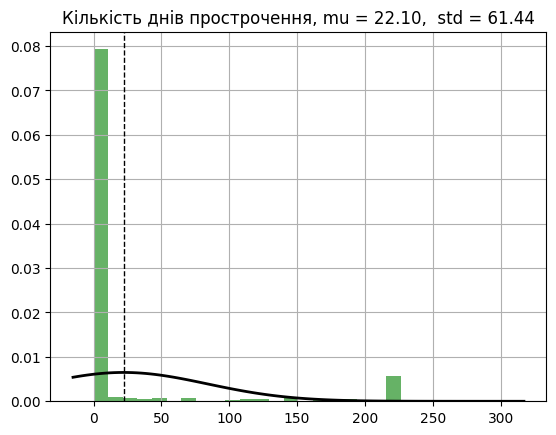

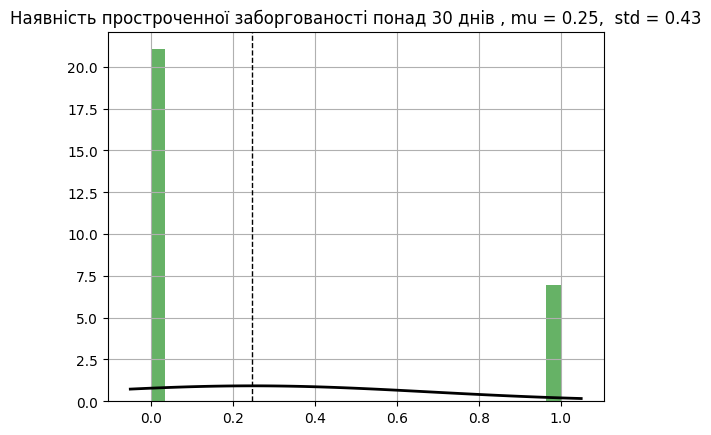

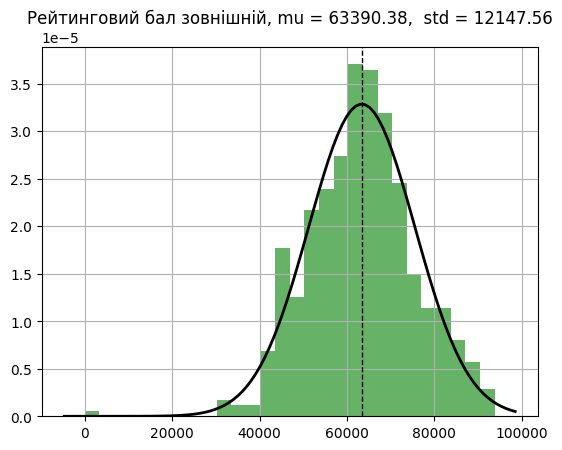

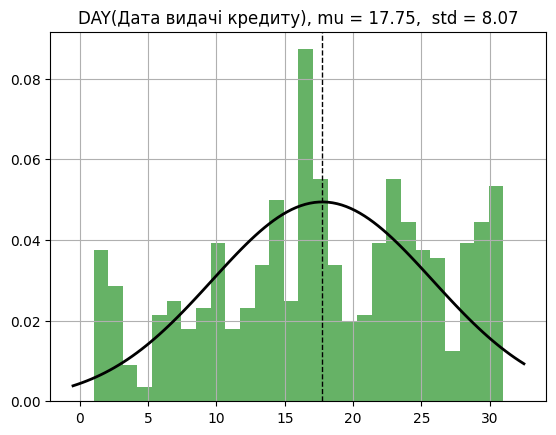

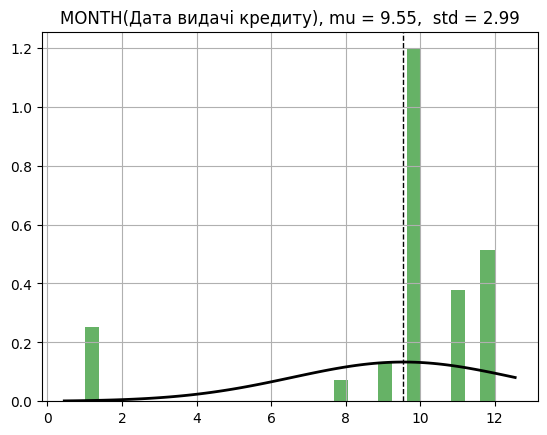

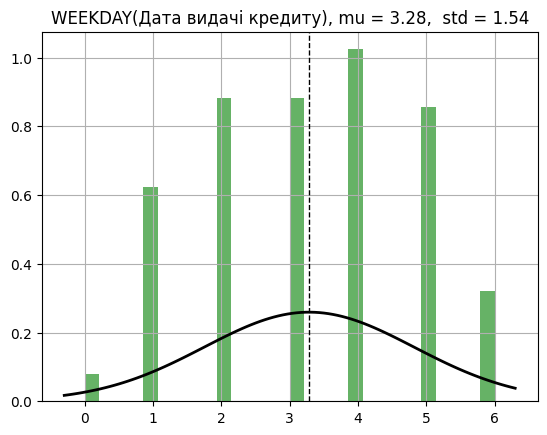

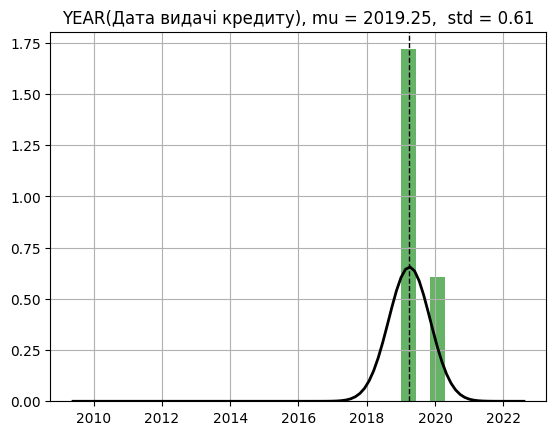

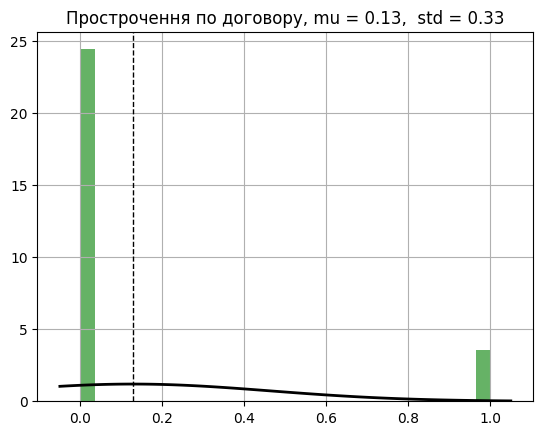

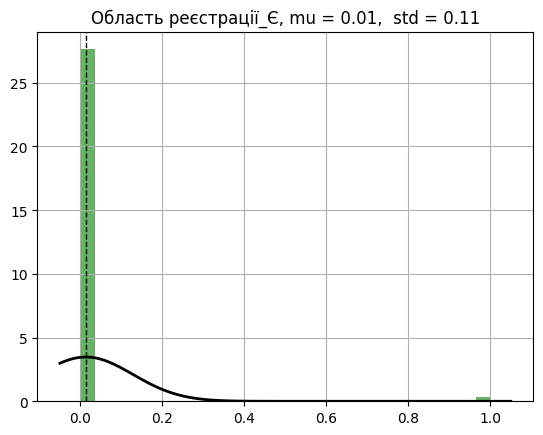

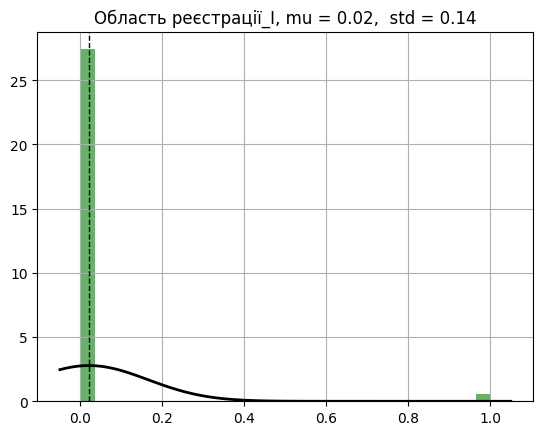

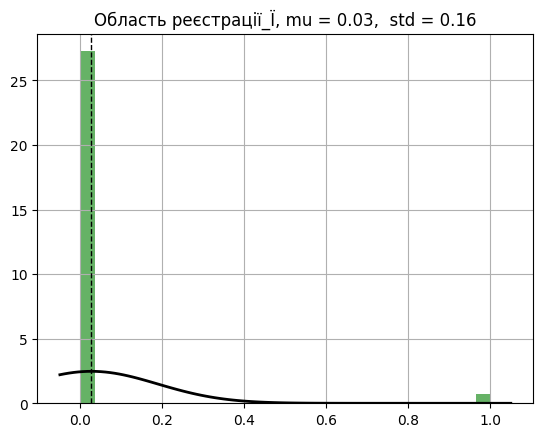

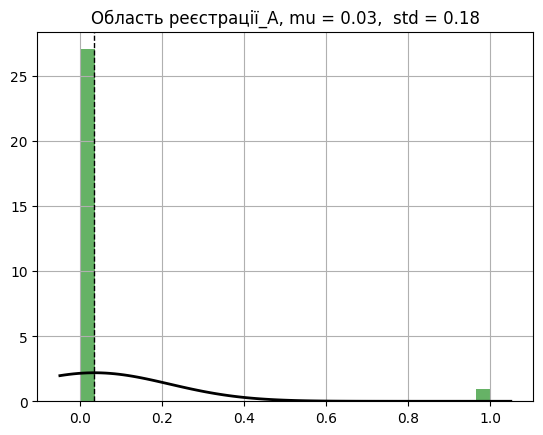

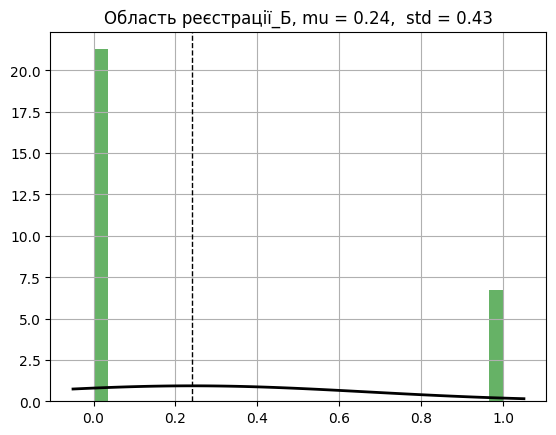

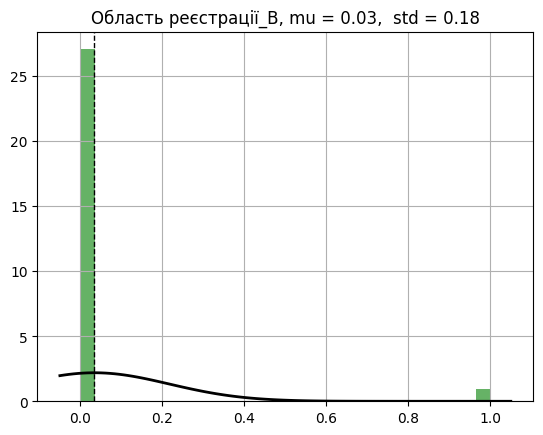

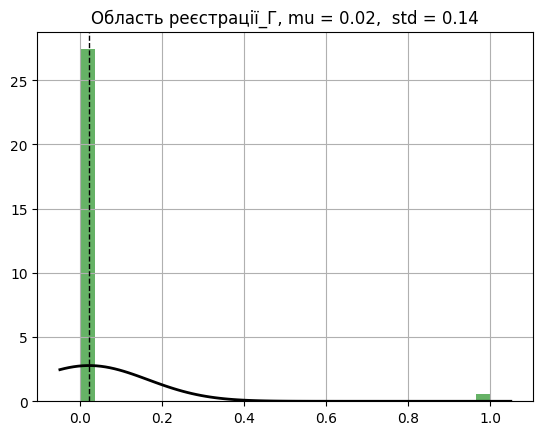

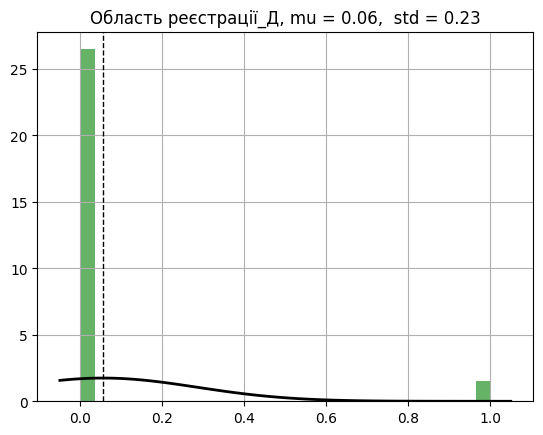

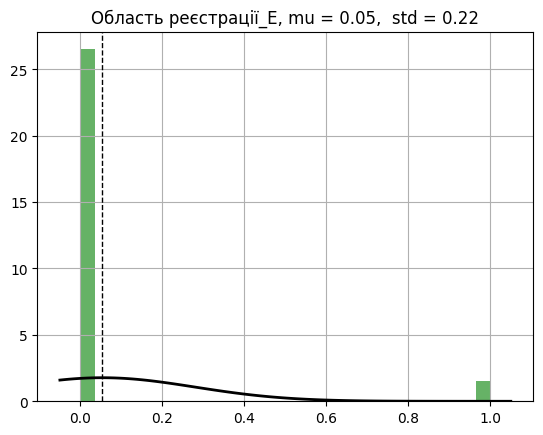

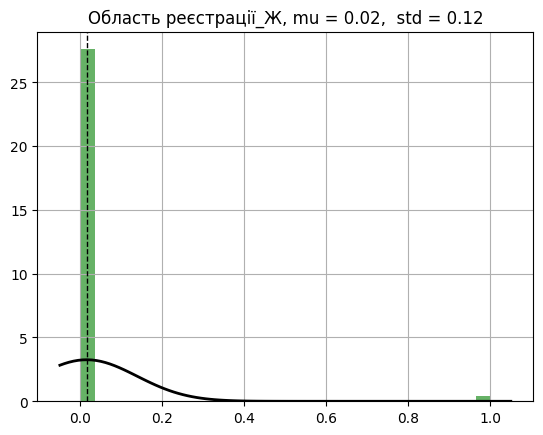

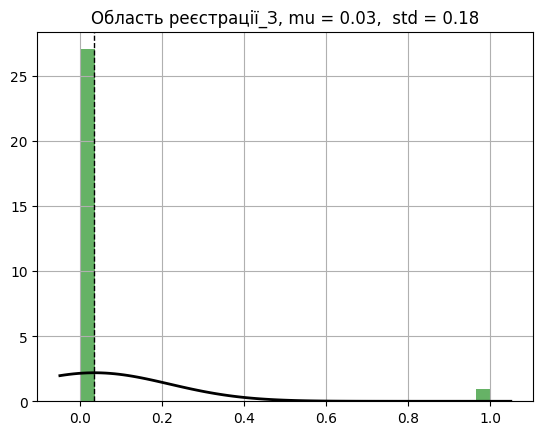

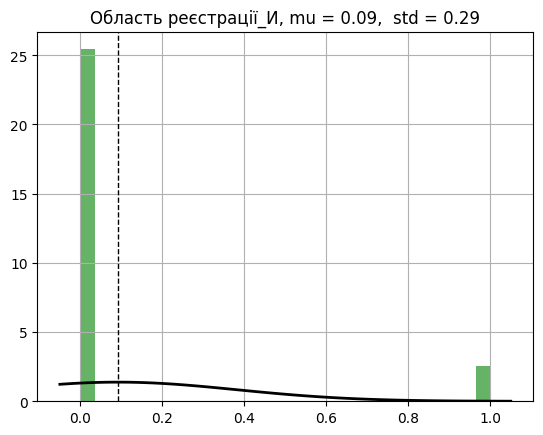

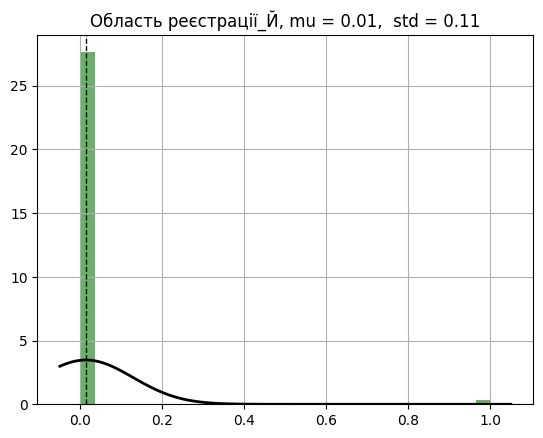

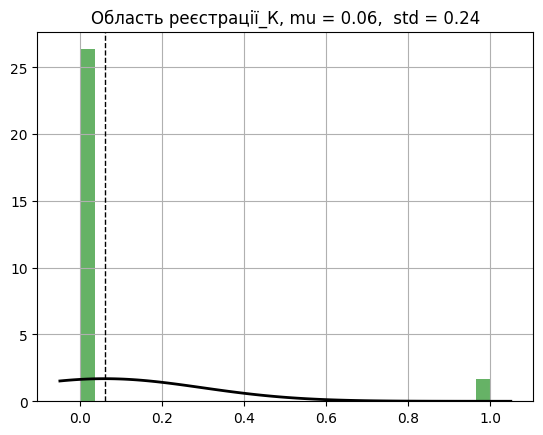

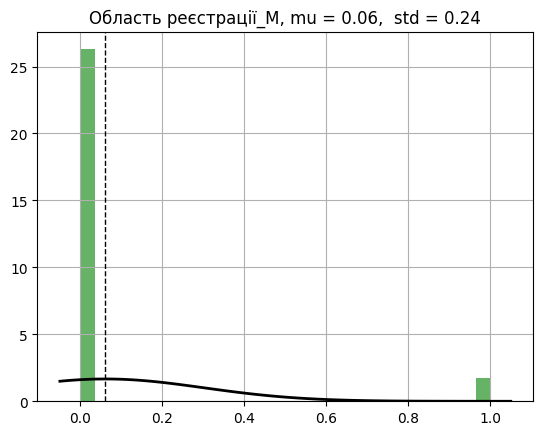

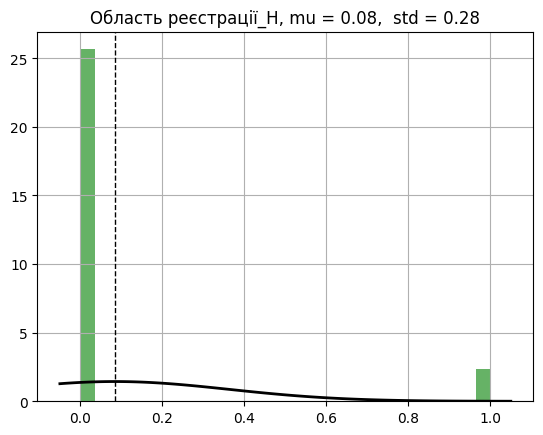

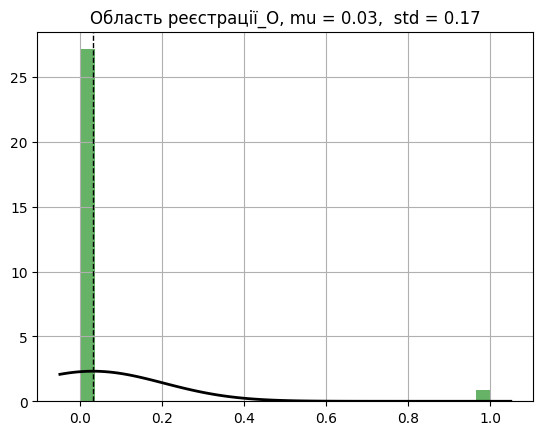

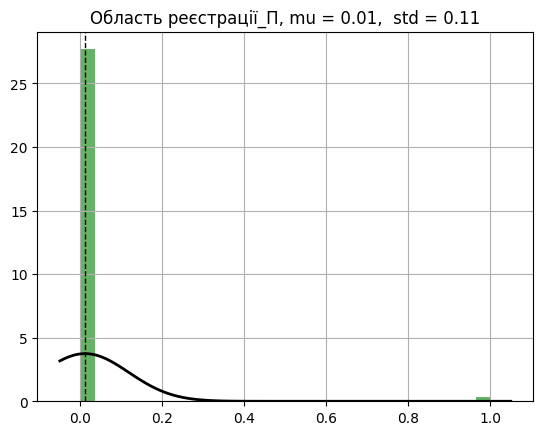

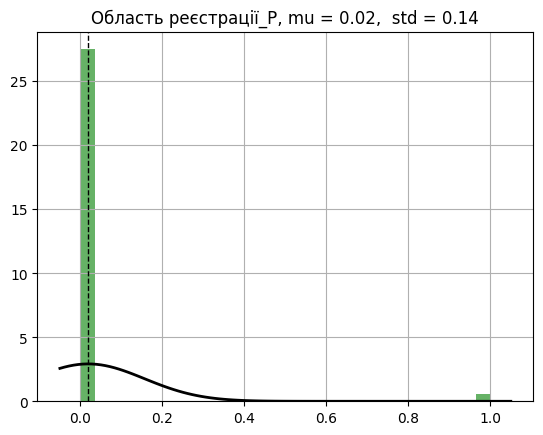

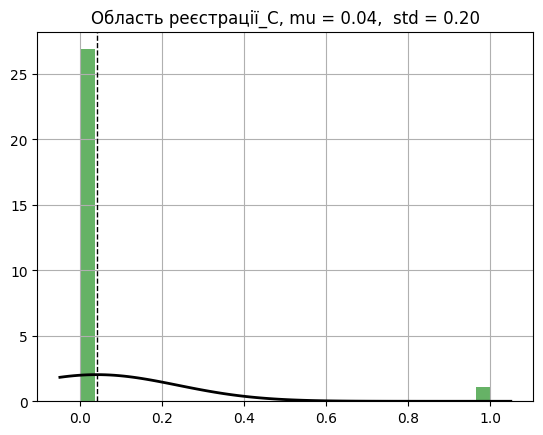

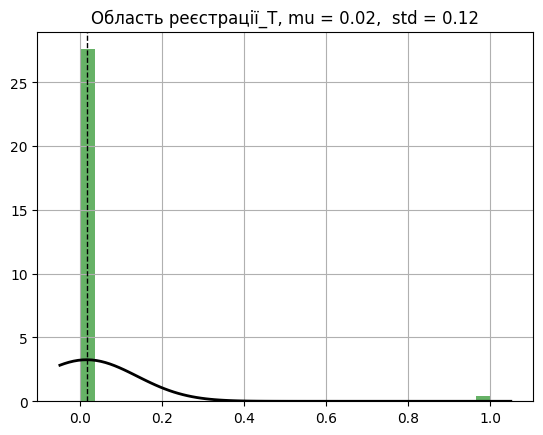

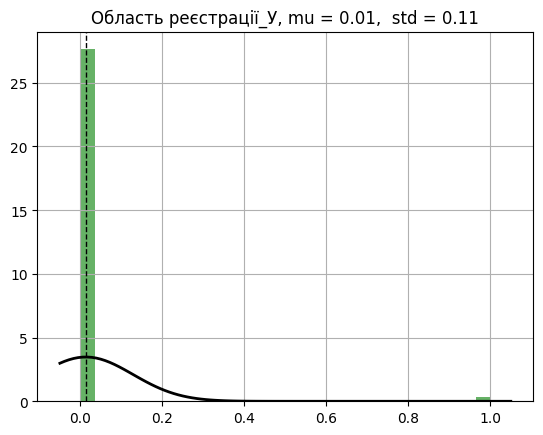

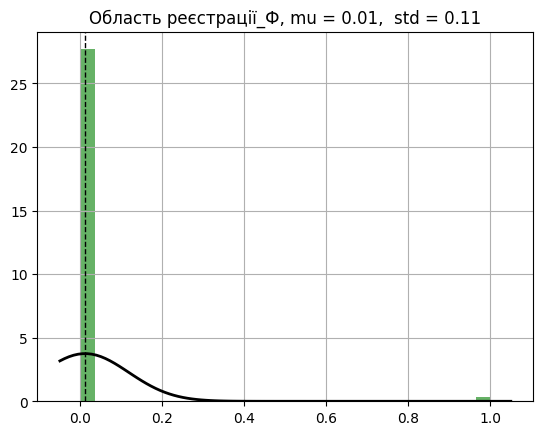

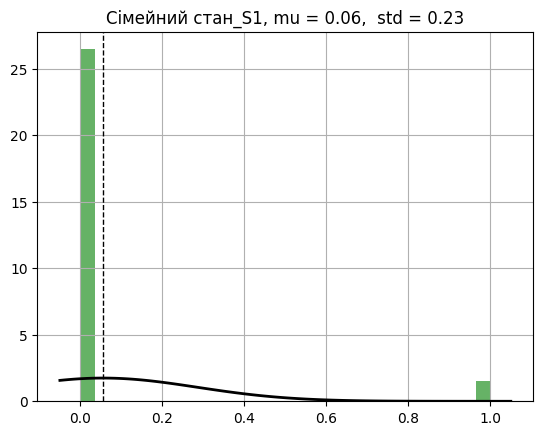

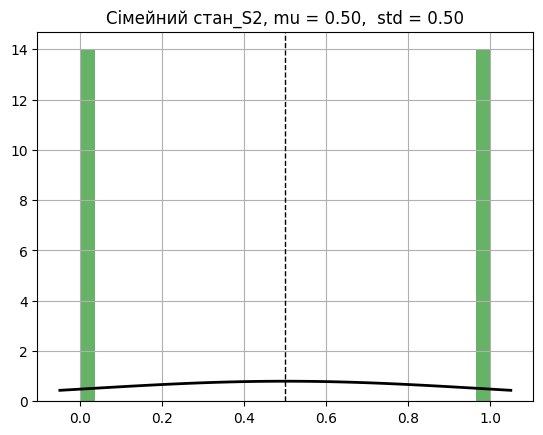

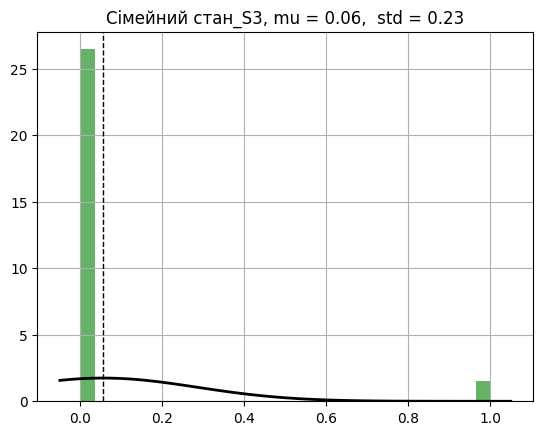

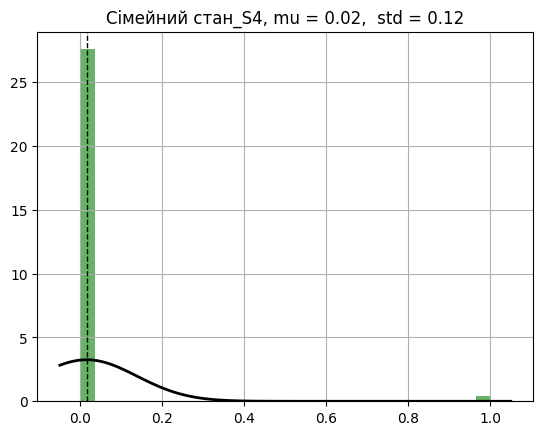

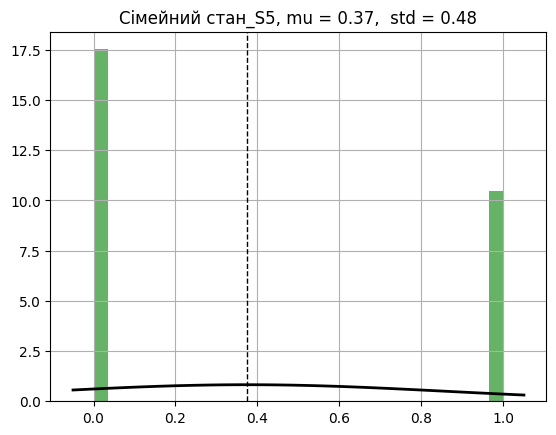

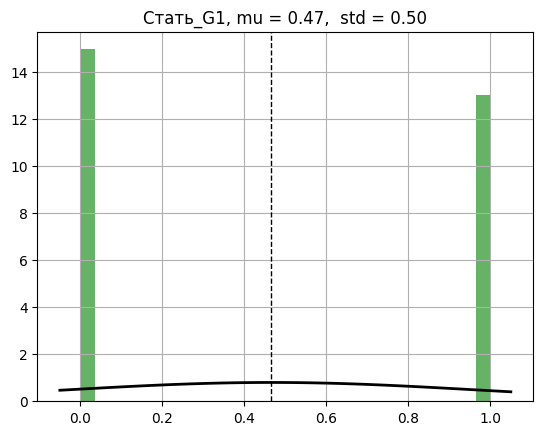

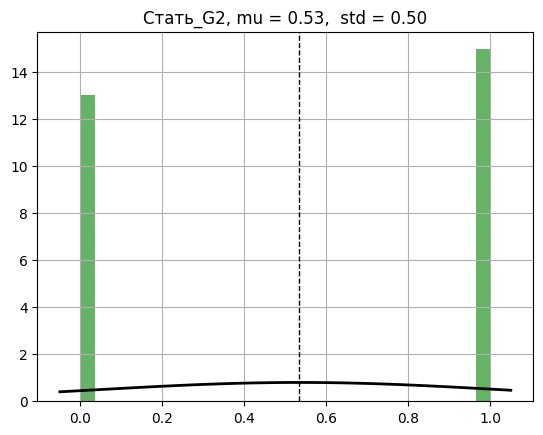

In [ ]:
all_hist(df)

# Feature Selection

In [ ]:
df.columns

Index(['Сумма кредиту', 'Загальна заборгованість', 'Наявність утриманців',
       'Сектор діяльності', 'Строк кредиту', 'Кількість днів прострочення',
       'Наявність простроченної заборгованості понад 30 днів ',
       'Рейтинговий бал зовнішній', 'DAY(Дата видачі кредиту)',
       'MONTH(Дата видачі кредиту)', 'WEEKDAY(Дата видачі кредиту)',
       'YEAR(Дата видачі кредиту)', 'Прострочення по договору',
       'Область реєстрації_Є', 'Область реєстрації_І', 'Область реєстрації_Ї',
       'Область реєстрації_А', 'Область реєстрації_Б', 'Область реєстрації_В',
       'Область реєстрації_Г', 'Область реєстрації_Д', 'Область реєстрації_Е',
       'Область реєстрації_Ж', 'Область реєстрації_З', 'Область реєстрації_И',
       'Область реєстрації_Й', 'Область реєстрації_К', 'Область реєстрації_М',
       'Область реєстрації_Н', 'Область реєстрації_О', 'Область реєстрації_П',
       'Область реєстрації_Р', 'Область реєстрації_С', 'Область реєстрації_Т',
       'Область реєстрації_У', 'Обл

In [ ]:
from sklearn.model_selection import train_test_split

y_name = ['Прострочення по договору']



df_ft_sc_x = df_cp.copy()


df_ft_sc_y = df_ft_sc_x[y_name].copy()



cls = ['Сумма кредиту', 'Загальна заборгованість', 'Строк кредиту',
       'Наявність простроченної заборгованості понад 30 днів ',
       'MONTH(Дата видачі кредиту)', 'Стать_G1']

df_ft_sc_x = df_ft_sc_x[cls]


X_train_impr, X_test_impr, y_train_impr, y_test_impr = train_test_split(df_ft_sc_x, df_ft_sc_y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

clf_3=xgb.XGBClassifier()
rfecv=RFECV(estimator=clf_3,step=1,cv=5,scoring='accuracy',n_jobs=-1).fit(X_train_impr,y_train_impr)

print('Optimal features =',rfecv.n_features_)
print(' Best features =',X_train_impr.columns[rfecv.support_])

Optimal features = 6
 Best features = Index(['Сумма кредиту', 'Загальна заборгованість', 'Строк кредиту',
       'Наявність простроченної заборгованості понад 30 днів ',
       'MONTH(Дата видачі кредиту)', 'Стать_G1'],
      dtype='object')


In [ ]:
accuracy_score(y_test_impr,rfecv.predict(X_test_impr))

0.9809523809523809

In [ ]:
from sklearn.metrics import f1_score
y_pred = rfecv.predict(X_test_impr)
f1 = f1_score(y_test_impr, y_pred)
print(f"F1 score: {f1:.2f}")

F1 score: 0.88


Accuracy: 0.98095
F1 Score: 0.93235
Feature: Наявність простроченної заборгованості понад 30 днів , Score: 0.94333
Feature: Загальна заборгованість, Score: 0.01871
Feature: Сумма кредиту, Score: 0.01192
Feature: Строк кредиту, Score: 0.01073
Feature: MONTH(Дата видачі кредиту), Score: 0.00904
Feature: Стать_G1, Score: 0.00626


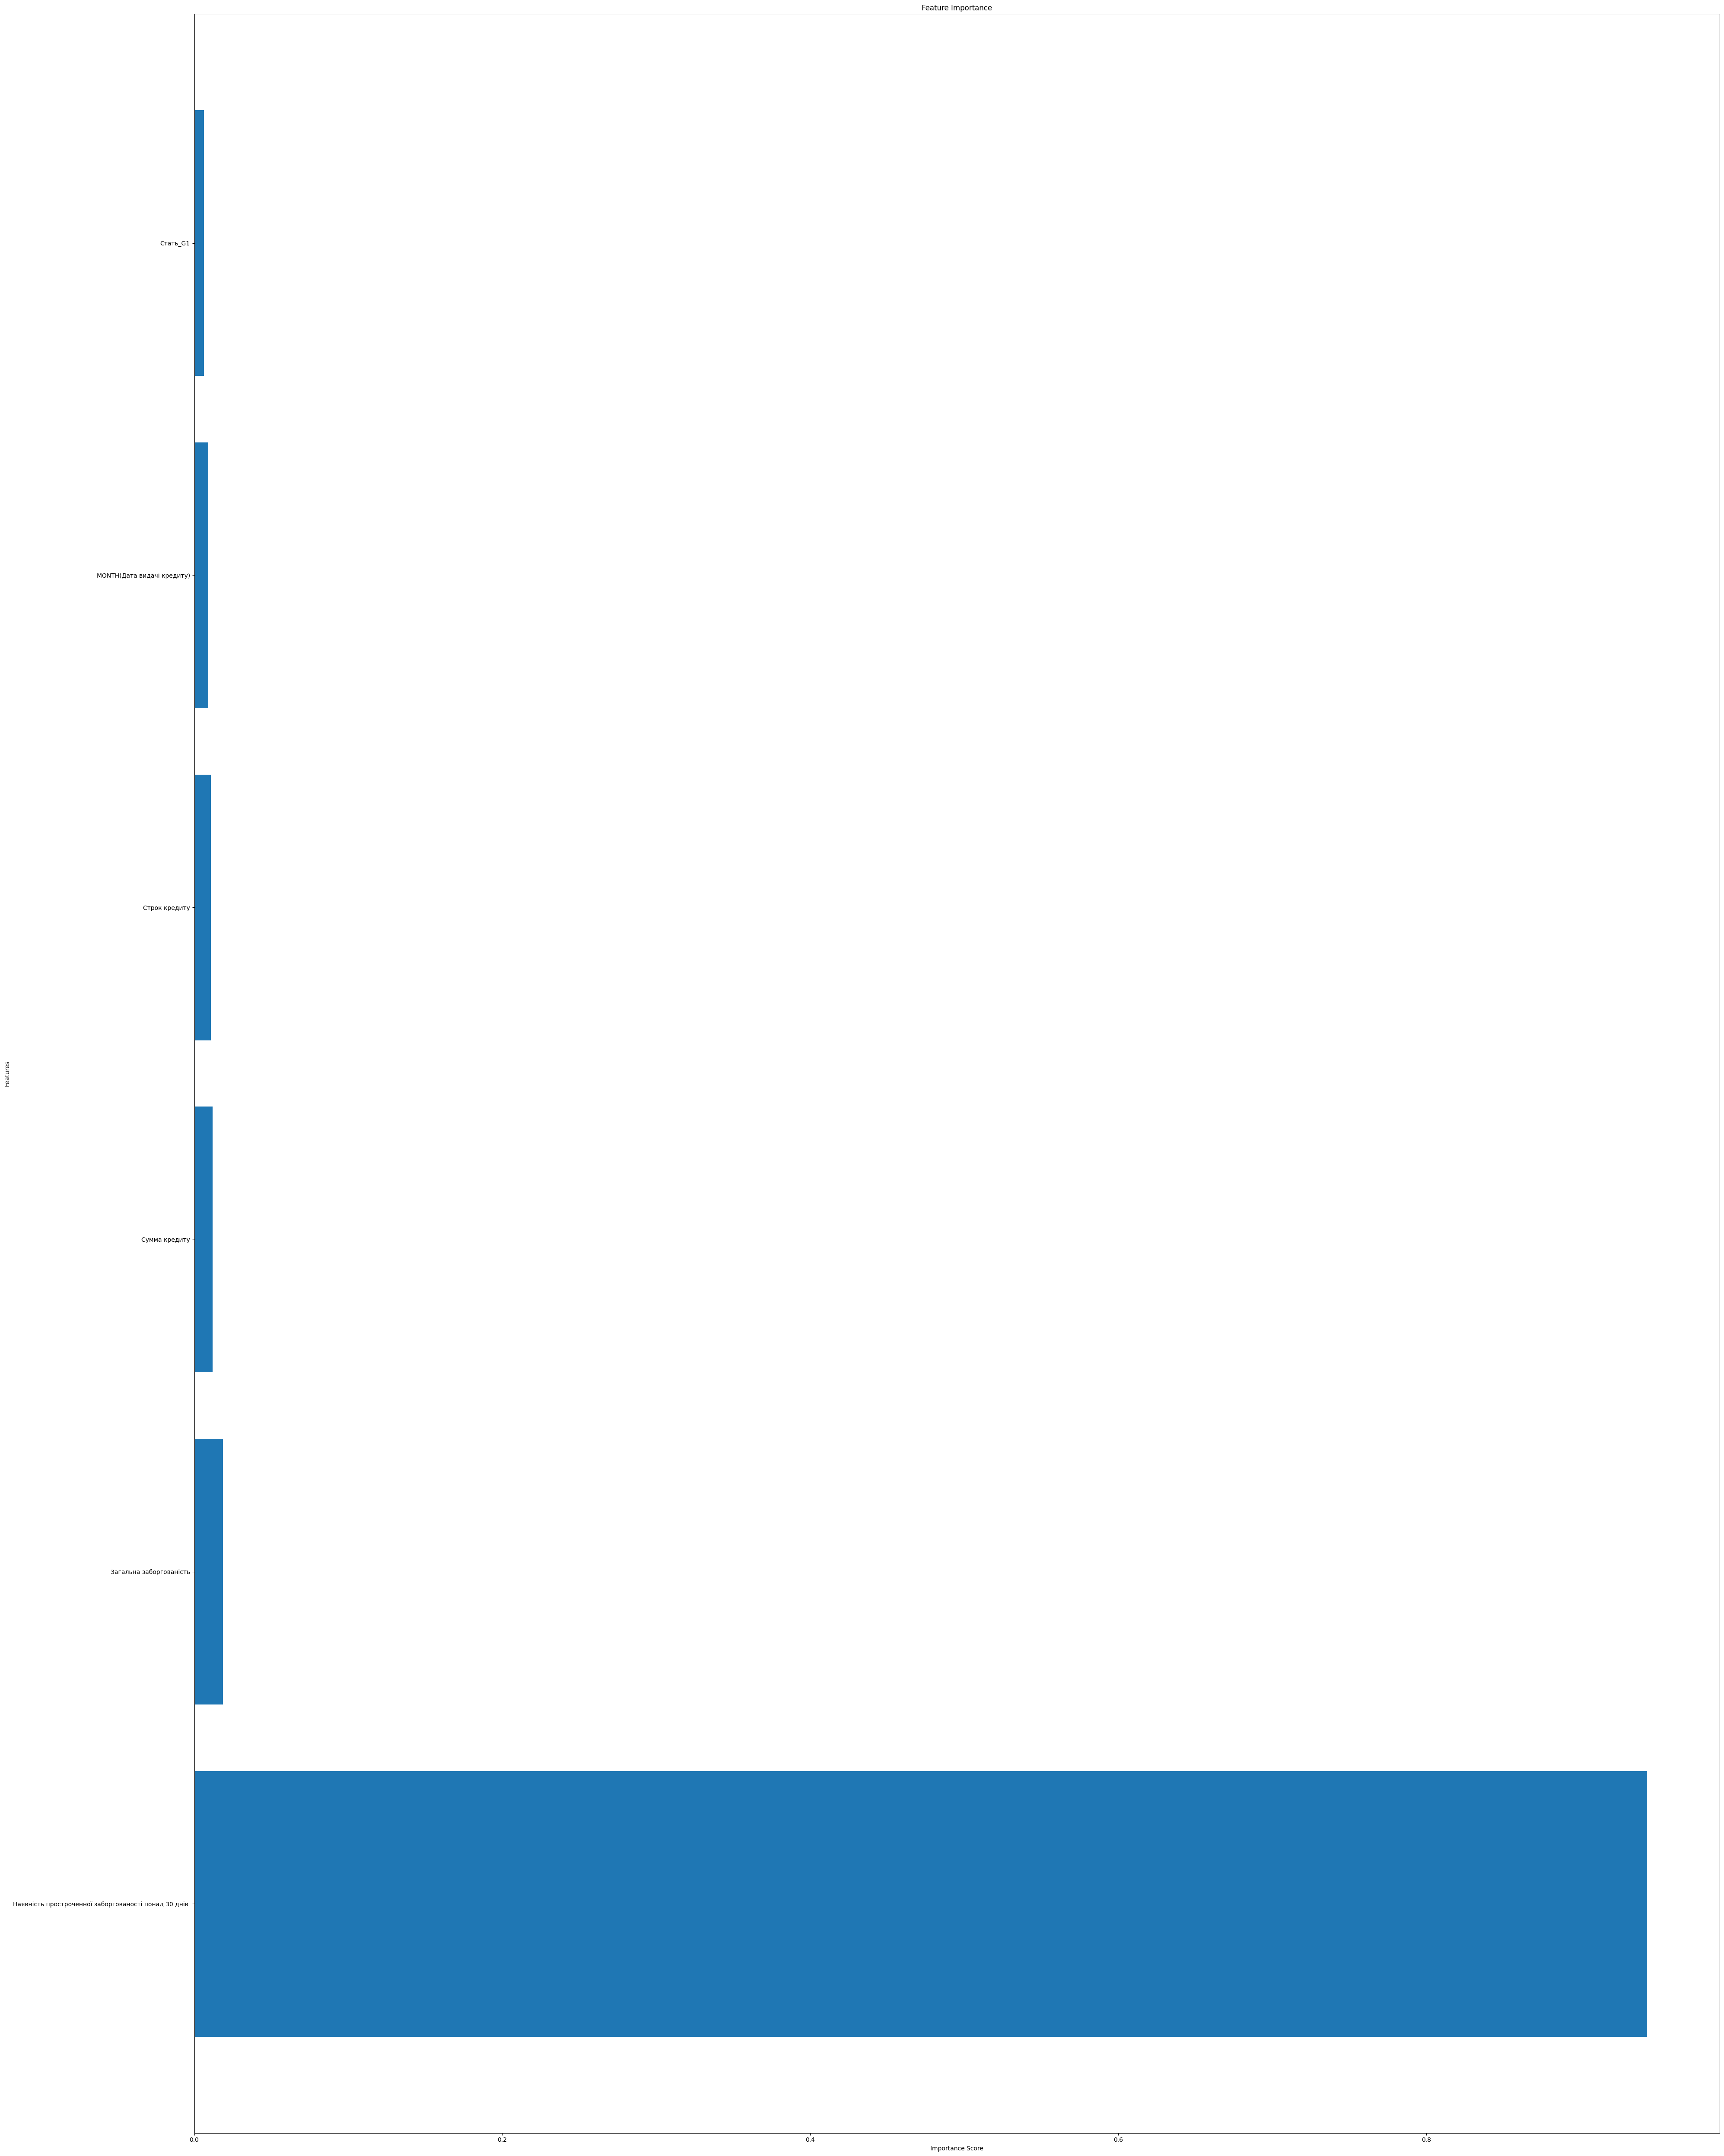

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score



model = XGBClassifier( n_estimators  = 500,
                          max_depth = 10,
                          learning_rate = 0.1,
                          random_state = 42,)
model.fit(X_train_impr, y_train_impr)

y_pred = model.predict(X_test_impr)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_impr, y_pred)
f1 = f1_score(y_test_impr, y_pred, average='macro')  # Use 'binary' for binary classification

# Print out the metrics
print(f"Accuracy: {accuracy:.5f}")
print(f"F1 Score: {f1:.5f}")

importance = model.feature_importances_


features_importances = [(i, v) for i, v in enumerate(importance)]


features_importances.sort(key=lambda x: x[1], reverse=True)


for i, v in features_importances:
    print('Feature: %s, Score: %.5f' % (df_ft_sc_x.columns[i], v))


plt.figure(figsize=(40, 50))


sorted_features = [df_ft_sc_x.columns[i] for i, _ in features_importances]
sorted_importance = [v for _, v in features_importances]

plt.barh(range(len(sorted_importance)), sorted_importance)
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


# Handling Disbalanced Classes

([<matplotlib.patches.Wedge at 0x7b9c85f3fbb0>,
 [Text(-1.5186612103280008, 0.6451109425866935, '0'),
  Text(1.5186612707276397, -0.6451108003993662, '1')],
 [Text(-0.8283606601789093, 0.3518786959563783, '87.2%'),
  Text(0.8283606931241669, -0.35187861839965423, '12.8%')])

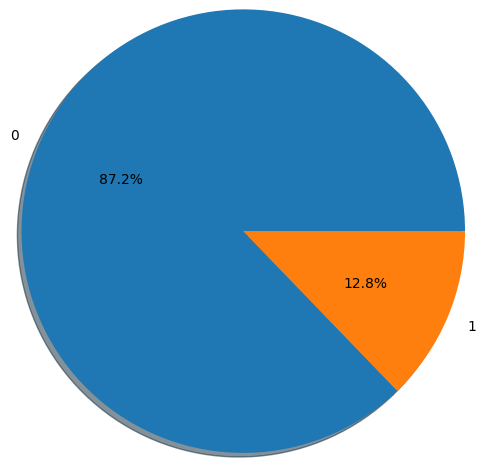

In [ ]:
times_of_day_counts = df['Прострочення по договору'].value_counts()
plt.pie(x=times_of_day_counts, labels=times_of_day_counts.index, autopct='%1.1f%%', shadow=True, radius=1.5)


In [ ]:
from sklearn.model_selection import train_test_split

y_name = ['Прострочення по договору']


df_ft_x = df.copy()


df_ft_y = df_ft_x[y_name].copy()


cls = ['Сумма кредиту', 'Загальна заборгованість', 'Строк кредиту',
       'Наявність простроченної заборгованості понад 30 днів ',
       'MONTH(Дата видачі кредиту)', 'Стать_G1','Стать_G2']



df_ft_x = df_ft_x[cls]




In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_sm, y_sm  = smote.fit_resample(df_ft_x, df_ft_y)

([<matplotlib.patches.Wedge at 0x7b9c8e5f17e0>,
 [Text(1.0103336092965665e-16, 1.6500000000000001, '1'),
  Text(-3.0310008278896993e-16, -1.6500000000000001, '0')],
 [Text(5.510910596163089e-17, 0.8999999999999999, '50.0%'),
  Text(-1.6532731788489266e-16, -0.8999999999999999, '50.0%')])

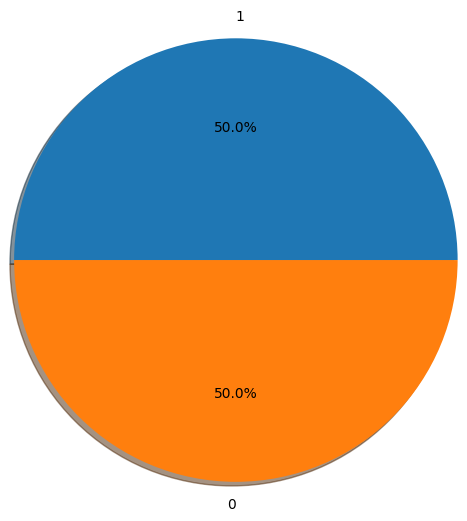

In [ ]:
times_of_day_counts = y_sm['Прострочення по договору'].value_counts()
plt.pie(x=times_of_day_counts, labels=times_of_day_counts.index, autopct='%1.1f%%', shadow=True, radius=1.5)


# The Second data set

In [ ]:
df2_test.head()

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус,results Kasianova,results Chernenko,result Lzkhovetskyi
0,10/2/2019,104,50 000,10 311,11.0,88,0.0,Б,60.75,15,0,0,84600.0,1,0,5%,0
1,10/9/2019,111,120 000,80 100,12.0,88,0.0,Б,58.43,27,0,0,45200.0,1,0,51%,0
2,10/9/2019,113,120 000,10 302,11.0,99,0.0,Ї,46.23,15,0,0,67600.0,1,0,20%,0
3,10/10/2019,118,100 000,66 750,11.0,88,0.0,Н,38.72,27,0,0,75800.0,1,0,29%,0
4,10/10/2019,121,50 000,39 677,14.0,99,0.0,Б,60.63,27,117,1,53000.0,1,1,34%,1


In [ ]:

for i in df.columns:
  print(i,df[i].dtype)
  print('--------------')

Сумма кредиту float64
--------------
Загальна заборгованість float64
--------------
Наявність утриманців float64
--------------
Сектор діяльності float64
--------------
Строк кредиту int64
--------------
Кількість днів прострочення int64
--------------
Наявність простроченної заборгованості понад 30 днів  int64
--------------
Рейтинговий бал зовнішній float64
--------------
DAY(Дата видачі кредиту) int64
--------------
MONTH(Дата видачі кредиту) int64
--------------
WEEKDAY(Дата видачі кредиту) int64
--------------
YEAR(Дата видачі кредиту) int64
--------------
Прострочення по договору int64
--------------
Область реєстрації_Є float64
--------------
Область реєстрації_І float64
--------------
Область реєстрації_Ї float64
--------------
Область реєстрації_А float64
--------------
Область реєстрації_Б float64
--------------
Область реєстрації_В float64
--------------
Область реєстрації_Г float64
--------------
Область реєстрації_Д float64
--------------
Область реєстрації_Е float64
-----

In [ ]:

for i in df2_test.columns:
  print(i,df2_test[i].dtype)
  print('--------------')

Дата видачі кредиту object
--------------
№ договору int64
--------------
Сумма кредиту object
--------------
Загальна заборгованість object
--------------
Сімейний стан float64
--------------
Стать int64
--------------
Наявність утриманців float64
--------------
Область реєстрації object
--------------
Сектор діяльності float64
--------------
Строк кредиту int64
--------------
Кількість днів прострочення int64
--------------
Наявність простроченної заборгованості понад 30 днів  int64
--------------
Рейтинговий бал зовнішній float64
--------------
Статус int64
--------------
results Kasianova int64
--------------
results Chernenko object
--------------
result Lzkhovetskyi int64
--------------


In [ ]:
df2_test['Стать'] = df2_test['Стать'].map({88:'G1',99:'G2'})

In [ ]:
df2_test

,Дата видачі кредиту,№ договору,Сумма кредиту,Загальна заборгованість,Сімейний стан,Стать,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,Статус,results Kasianova,results Chernenko,result Lzkhovetskyi
0,10/2/2019,104,50 000,10 311,11.0,G1,0.0,Б,60.75,15,0,0,84600.0,1,0,5%,0
1,10/9/2019,111,120 000,80 100,12.0,G1,0.0,Б,58.43,27,0,0,45200.0,1,0,51%,0
2,10/9/2019,113,120 000,10 302,11.0,G2,0.0,Ї,46.23,15,0,0,67600.0,1,0,20%,0
3,10/10/2019,118,100 000,66 750,11.0,G1,0.0,Н,38.72,27,0,0,75800.0,1,0,29%,0
4,10/10/2019,121,50 000,39 677,14.0,G2,0.0,Б,60.63,27,117,1,53000.0,1,1,34%,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,10/21/2020,738,80 000,80 000,11.0,G2,0.0,Є,60.53,12,0,0,70000.0,1,0,16%,0
128,10/22/2020,745,170 000,170 000,14.0,G1,0.0,Б,60.88,12,0,0,58400.0,1,0,16%,0
129,10/28/2020,752,120 000,120 000,11.0,G1,0.0,Є,59.84,24,0,0,43200.0,1,0,33%,0
130,10/29/2020,755,50 000,50 000,14.0,G2,0.0,В,69.21,18,0,0,50200.0,1,0,23%,1


In [ ]:
df2_test['Прострочення по договору'] = df2_test['Кількість днів прострочення'] > 30

In [ ]:
df2_test['Прострочення по договору'] = df2_test['Прострочення по договору'].map({True:1,False:0})

In [ ]:
import re

def convert_to_numeric(value_str):
    # Remove the non-breaking space character
    cleaned_str = re.sub(r'\xa0', '', value_str)

    # Convert the cleaned string to a float
    numeric_value = float(cleaned_str)

    return numeric_value


In [ ]:
df2_test['Загальна заборгованість'] = df2_test['Загальна заборгованість'].map(convert_to_numeric)

In [ ]:

df2_test['Сумма кредиту'] = df2_test['Сумма кредиту'].map(convert_to_numeric)

In [ ]:
df2_test['Наявність утриманців'] = df2_test['Наявність утриманців'].astype(float)

In [ ]:
df2_test.dropna(inplace=True)

In [ ]:
df_cp = df2_test.copy()

hot_col = ['Стать']


hot = pd.get_dummies(df_cp[hot_col])
hot = hot.astype('float64')
df_cp = df_cp.drop(hot_col,axis=1)
df_cp = df_cp.join(hot)





In [ ]:
df2 =  df_cp.copy()

In [ ]:
es = ft.EntitySet(id='№ договору')
es = es.add_dataframe(dataframe_name='clients',dataframe=df2,index='№ договору')

feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name='clients',
                                      max_depth=2)


print(feature_defs)
print(feature_matrix.head())

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

[<Feature: Сумма кредиту>, <Feature: Загальна заборгованість>, <Feature: Сімейний стан>, <Feature: Наявність утриманців>, <Feature: Область реєстрації>, <Feature: Сектор діяльності>, <Feature: Строк кредиту>, <Feature: Кількість днів прострочення>, <Feature: Наявність простроченної заборгованості понад 30 днів >, <Feature: Рейтинговий бал зовнішній>, <Feature: Статус>, <Feature: results Kasianova>, <Feature: results Chernenko>, <Feature: result Lzkhovetskyi>, <Feature: Прострочення по договору>, <Feature: Стать_G1>, <Feature: Стать_G2>, <Feature: DAY(Дата видачі кредиту)>, <Feature: MONTH(Дата видачі кредиту)>, <Feature: WEEKDAY(Дата видачі кредиту)>, <Feature: YEAR(Дата видачі кредиту)>]
            Сумма кредиту  Загальна заборгованість  Сімейний стан  \
№ договору                                                          
104               50000.0                  10311.0           11.0   
111              120000.0                  80100.0           12.0   
113              120000.0 

In [ ]:
df2 = feature_matrix.copy()

In [ ]:
df2.head()

,Сумма кредиту,Загальна заборгованість,Сімейний стан,Наявність утриманців,Область реєстрації,Сектор діяльності,Строк кредиту,Кількість днів прострочення,Наявність простроченної заборгованості понад 30 днів,Рейтинговий бал зовнішній,...,results Kasianova,results Chernenko,result Lzkhovetskyi,Прострочення по договору,Стать_G1,Стать_G2,DAY(Дата видачі кредиту),MONTH(Дата видачі кредиту),WEEKDAY(Дата видачі кредиту),YEAR(Дата видачі кредиту)
№ договору,,,,,,,,,,,,,,,,,,,,,
104,50000.0,10311.0,11.0,0.0,Б,60.75,15,0,0,84600.0,...,0,5%,0,0,1.0,0.0,2,10,2,2019
111,120000.0,80100.0,12.0,0.0,Б,58.43,27,0,0,45200.0,...,0,51%,0,0,1.0,0.0,9,10,2,2019
113,120000.0,10302.0,11.0,0.0,Ї,46.23,15,0,0,67600.0,...,0,20%,0,0,0.0,1.0,9,10,2,2019
118,100000.0,66750.0,11.0,0.0,Н,38.72,27,0,0,75800.0,...,0,29%,0,0,1.0,0.0,10,10,3,2019
121,50000.0,39677.0,14.0,0.0,Б,60.63,27,117,1,53000.0,...,1,34%,1,1,0.0,1.0,10,10,3,2019


In [ ]:
cls = ['Сумма кредиту', 'Загальна заборгованість', 'Строк кредиту',
       'Наявність простроченної заборгованості понад 30 днів ',
       'MONTH(Дата видачі кредиту)', 'Стать_G1','Стать_G2']

In [ ]:
df2_for_testing = df2[cls].copy()

In [ ]:
y_test = df2['Прострочення по договору'].copy()

X_test = df2_for_testing.copy()

# Building the Model

In [ ]:
from xgboost import XGBClassifier


classifier = XGBClassifier(


                          n_estimators = 1000,
                         max_depth = 6,
                          learning_rate = 0.013964061226583412
                              )

classifier.fit(X_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.013964061226583412,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def clf_eval(y_test, y_pred, y_proba=None):

    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)

    f1 = f1_score(y_test, y_pred, average='binary')

    print("Accuracy: {:.3f}".format(accuracy))
    for i, (p, r) in enumerate(zip(precision, recall)):
        print(f"Class {i}: Precision = {p}, Recall = {r}")

    print("F1-Score: {:.2f}".format(f1))

    if y_proba is not None:
        # Обчислення ROC-AUC може вимагати додаткових дій для багатокласової класифікації
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        print("ROC-AUC: {:.2f}".format(roc_auc))

In [ ]:
clf_eval(y_test,y_pred)

Accuracy: 0.976
Class 0: Precision = 1.0, Recall = 0.9732142857142857
Class 1: Precision = 0.8333333333333334, Recall = 1.0
F1-Score: 0.91


In [ ]:
y_test.shape

(127,)

In [ ]:
y_pred.shape

(127,)

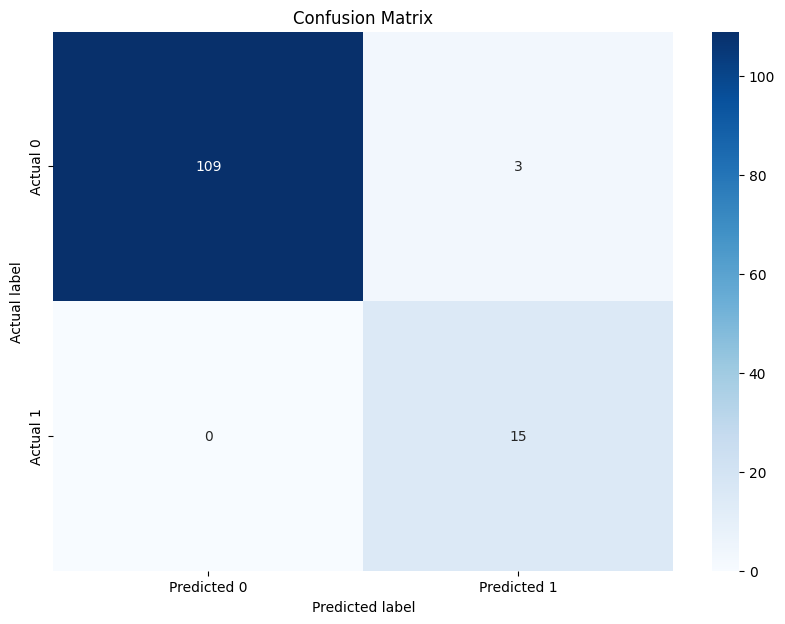

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])



plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install optuna

In [ ]:
import optuna


from sklearn.metrics import f1_score

'''
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    # Convert probabilities to binary predictions assuming a threshold of 0.5
    preds = [1 if i >= 0.5 else 0 for i in y_pred]
    return 'f1', f1_score(y_true, preds)
'''


def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'eval_metric': 'logloss',
        'random_state': 42
    }

    # Initialize and train the model
    model = XGBClassifier(**param)
    model.fit(X_sm, y_sm)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)  # Calculate F1 Score here
    return f1  # Return F1 Score as the objective value

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=300)

# Best trial details
print('Best trial:')
trial = study.best_trial
print(f'  F1: {trial.value:.3f}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2024-05-14 12:19:11,665] A new study created in memory with name: no-name-7c0e4876-0e81-450d-9aa4-627fa7168851
[I 2024-05-14 12:19:12,085] Trial 0 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 951, 'max_depth': 7, 'learning_rate': 0.09440375017175158}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-05-14 12:19:12,515] Trial 1 finished with value: 0.8387096774193549 and parameters: {'n_estimators': 904, 'max_depth': 7, 'learning_rate': 0.05662421093792401}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-05-14 12:19:13,156] Trial 2 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 487, 'max_depth': 8, 'learning_rate': 0.07980318499875298}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-05-14 12:19:13,239] Trial 3 finished with value: 0.8333333333333333 and parameters: {'n_estimators': 140, 'max_depth': 3, 'learning_rate': 0.07547764311986034}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-05-14 12:1

Best trial:
  F1: 0.909
  Params: 
    n_estimators: 1000
    max_depth: 6
    learning_rate: 0.013964061226583412
